# 0. Import Library

In [1]:
import tensorflow as tf
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from plot_results import *
from build_models import *

# 1. Data

## 1-1 Load data that already splited and preprocessed

In [75]:
#x_data = np.load('data/celeba_split/celeba_140000.npy')
x_data = np.load('data/celeba_split/celeba_20000.npy')
#y_data = np.load('data/y_30000.npy', allow_pickle=True)
#x_data = x_data/255
#print('* data shape: ', x_data.shape, y_data.shape)

In [76]:
x_data.shape

(20000, 64, 64, 3)

# 2. Load Model 

## 2-1. Get VAE model structure from build_vae.py

In [119]:
encoder, decoder, vae = build_vae(x_data, 100)
#encoder.summary()
#decoder.summary()
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 277160    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         251843    
Total params: 529,003
Trainable params: 529,003
Non-trainable params: 0
_________________________________________________________________


In [120]:
vae.load_weights('./results/train_10/ckp-5.index')

AssertionError: Some objects had attributes which were not restored:
    <tf.Variable 'conv2d_24/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[ 4.50927317e-02,  1.15735456e-01, -1.02385342e-01,
           1.07964963e-01,  1.17785022e-01, -8.69886577e-03,
          -6.83591217e-02, -8.97232741e-02, -1.36058256e-01,
          -1.03913471e-01,  1.29325256e-01,  1.15647927e-01,
           1.04699701e-01,  6.92144781e-02, -2.94843242e-02,
          -1.28807575e-01, -5.14585748e-02,  1.06863499e-01,
          -3.63395661e-02, -8.38356316e-02, -3.23280320e-02,
          -1.89308748e-02, -9.27270949e-02,  1.37083247e-01,
           6.71825409e-02, -6.88469410e-03, -1.00203879e-01,
           9.51239169e-02, -1.08081698e-02, -1.18741997e-01,
           1.07550323e-02, -2.84309462e-02],
         [ 7.86995888e-03, -9.95133668e-02,  1.90978944e-02,
           4.86408919e-02,  1.21565476e-01,  5.16622514e-02,
          -5.51256612e-02, -9.38221067e-02,  3.37031931e-02,
           1.30979285e-01,  3.80756557e-02,  9.63935554e-02,
          -1.01698518e-01,  6.24205470e-02, -9.00359750e-02,
           8.65950733e-02,  1.23208016e-02, -1.07422158e-01,
          -1.84089392e-02,  1.24082193e-01, -1.17984861e-01,
           3.71448547e-02,  1.31581560e-01, -4.19419184e-02,
          -1.20776638e-01, -1.91572905e-02, -7.84617364e-02,
          -1.16467282e-01,  3.26468199e-02, -1.09270915e-01,
          -2.76774839e-02,  1.00825414e-01],
         [ 1.37717888e-01, -1.32715985e-01, -1.04825042e-01,
           1.96693242e-02, -4.69547212e-02,  7.48978406e-02,
          -2.76115760e-02, -8.01927000e-02,  1.08000562e-01,
           1.28955349e-01,  6.71379119e-02, -4.91374955e-02,
           1.95609331e-02, -1.27245307e-01,  5.85541576e-02,
          -1.08890079e-01,  1.33939400e-01, -1.06398948e-01,
          -2.82354876e-02,  5.44179678e-02,  2.99526751e-03,
          -9.39513594e-02,  4.96962517e-02, -5.16528487e-02,
           1.30143508e-01,  3.09446454e-02, -5.77951968e-03,
           3.69775295e-02,  4.28388417e-02,  1.19671226e-04,
           6.63561374e-02,  3.99889201e-02]],

        [[ 6.23542666e-02,  7.34332800e-02,  1.03017122e-01,
           8.01928341e-03, -2.85636485e-02, -6.07133731e-02,
          -2.20384449e-02,  7.61822909e-02, -3.16712260e-03,
          -5.62345907e-02, -1.25235021e-01, -1.09163649e-01,
           3.82775068e-02,  1.33588269e-01, -1.68760642e-02,
           1.31276891e-01, -4.83333990e-02, -3.24279070e-04,
          -1.13514267e-01,  6.73662722e-02,  2.66536772e-02,
           1.16918758e-01, -7.29513541e-02, -3.69919091e-02,
           1.31973818e-01, -2.35660896e-02,  1.02359742e-01,
          -1.05181269e-01,  2.49799490e-02, -8.01691413e-02,
           9.22081470e-02,  5.97919077e-02],
         [ 1.23531595e-01,  5.37727475e-02,  1.00660801e-01,
           6.98131174e-02, -1.31675720e-01, -8.01583230e-02,
          -2.72290260e-02,  6.02447987e-02, -1.35964677e-02,
          -9.39532965e-02,  1.36453226e-01, -3.38615999e-02,
          -4.21997979e-02,  2.08024383e-02,  9.09426957e-02,
           3.82170528e-02,  5.80177009e-02,  1.17709950e-01,
          -2.23275498e-02, -7.95700401e-02, -9.08305570e-02,
          -4.02070731e-02, -3.22477818e-02, -6.43467307e-02,
           1.19828135e-02, -6.42726570e-02,  8.96164626e-02,
          -2.45784074e-02,  1.09949157e-01, -1.15596130e-01,
           1.73609555e-02,  1.17737904e-01],
         [ 1.19312808e-01,  9.71380025e-02,  1.21764436e-01,
           7.22575188e-02, -8.25853199e-02, -8.65470022e-02,
           7.31184483e-02,  1.52839720e-03, -2.36303806e-02,
          -5.93538582e-03,  2.81326920e-02, -3.25439870e-03,
           8.23937058e-02,  3.16131711e-02, -1.24785610e-01,
           1.61908120e-02, -1.08929828e-01,  1.09429553e-01,
          -2.02799737e-02,  2.75399834e-02,  1.15054443e-01,
          -1.26198739e-01, -8.27219337e-02, -1.16308555e-01,
          -9.22738314e-02, -1.37403876e-01,  1.23083934e-01,
           1.26825795e-01,  1.36965707e-01,  8.36634785e-02,
          -5.88549674e-02, -1.01838991e-01]],

        [[-3.98395658e-02, -9.56377387e-03,  6.66113049e-02,
           6.86814934e-02, -5.98452091e-02, -8.60237479e-02,
           4.57220376e-02, -8.86364877e-02,  5.66007793e-02,
           2.62475759e-02,  1.41623020e-02,  4.92371023e-02,
          -1.36421993e-01,  1.40298903e-02, -2.99703330e-02,
           3.48398983e-02,  1.15412816e-01,  6.36013001e-02,
          -4.25028801e-02, -1.17751509e-02,  2.27992982e-02,
          -7.40814209e-03,  8.49807262e-02,  5.87389469e-02,
           1.10578269e-01, -1.12395465e-01, -8.82112309e-02,
           6.78229630e-02,  4.35818732e-03,  5.41879684e-02,
          -4.50804532e-02, -4.37917709e-02],
         [ 2.38283724e-02,  8.00621361e-02, -1.88431516e-02,
          -8.06178674e-02, -2.83746123e-02,  1.08922452e-01,
          -7.54707828e-02, -1.08713016e-01, -6.86309487e-02,
           1.06968164e-01,  3.17082703e-02,  1.15871742e-01,
          -1.91438347e-02, -1.35346726e-02,  5.69390506e-02,
           1.11641526e-01, -2.12110206e-02, -6.19710311e-02,
           7.42537379e-02,  5.08904457e-03, -1.30043671e-01,
           9.39308852e-02, -1.24961711e-01, -9.19236913e-02,
          -1.20378092e-01, -8.34025443e-02,  7.07376450e-02,
          -1.09388947e-01, -9.18235928e-02,  7.78870881e-02,
           2.04559565e-02, -4.85950261e-02],
         [ 1.32037446e-01, -7.75213838e-02, -3.96615788e-02,
          -6.03508279e-02,  1.11618057e-01,  6.83212429e-02,
           2.80290842e-05,  7.03861266e-02,  1.10362113e-01,
          -6.04792535e-02, -8.87717977e-02,  1.14530221e-01,
          -7.32245371e-02, -4.54266444e-02, -3.62168029e-02,
          -3.18880975e-02, -6.43096864e-03,  3.65175158e-02,
          -5.40699735e-02,  4.20297682e-03, -6.90535083e-02,
          -1.33129865e-01, -1.31090805e-02,  1.12950996e-01,
          -4.05941382e-02,  5.76402247e-02,  1.20192602e-01,
           6.37235790e-02,  1.09733596e-01, -1.14715725e-01,
          -4.24018353e-02,  4.31129336e-02]]],


       [[[-4.32304740e-02, -5.30354753e-02, -7.19831958e-02,
          -4.38562930e-02,  5.66211194e-02, -1.00329801e-01,
          -1.24984153e-01,  7.24100024e-02, -8.36914778e-02,
          -7.16021582e-02,  8.09873939e-02, -3.41644213e-02,
          -1.27226487e-01,  1.19737461e-01,  1.18038654e-02,
          -4.19876277e-02,  5.09196967e-02, -4.12870124e-02,
           4.42338735e-02, -1.01659589e-01,  1.34827271e-01,
          -3.46096605e-02, -6.99629039e-02,  1.39627606e-02,
           6.61911815e-02, -1.07783981e-01, -7.48473704e-02,
           9.22261924e-02,  6.61450624e-03, -3.40605751e-02,
           8.05100054e-02, -1.00152776e-01],
         [-1.22693941e-01, -4.85221744e-02, -6.85665160e-02,
           7.08816946e-03,  1.09547019e-01, -1.35625169e-01,
          -7.01871812e-02,  7.78729469e-02,  3.05463970e-02,
           1.04098067e-01,  2.18581855e-02,  1.08047426e-02,
          -8.83315951e-02,  1.12618431e-01, -4.22149673e-02,
           1.26633093e-01,  1.14106312e-01, -1.25511736e-02,
           7.51584917e-02,  9.41661596e-02, -5.95096797e-02,
          -6.22009709e-02,  1.29296109e-01, -1.14510134e-01,
          -8.64746124e-02,  2.42339969e-02,  6.54274970e-02,
           1.00915909e-01,  7.88223147e-02, -1.27174705e-01,
           3.29907686e-02, -1.15015492e-01],
         [ 8.77846777e-02,  5.05555719e-02, -6.09453470e-02,
           5.62048107e-02,  1.31103918e-01, -1.22909665e-01,
           9.06552672e-02, -6.43874332e-02, -8.13074559e-02,
           6.59588724e-02,  3.06617320e-02,  8.10685307e-02,
           7.50246644e-02,  8.25145841e-03,  2.15355903e-02,
          -2.85193324e-04, -1.23414263e-01,  1.61848366e-02,
           3.96680981e-02,  1.23663828e-01, -1.09831817e-01,
           3.12613249e-02, -2.01850757e-02, -9.78169590e-02,
          -6.76685572e-03,  1.19886771e-01,  5.08069545e-02,
           6.15449697e-02,  8.57381672e-02, -1.19751692e-02,
          -5.34929559e-02,  8.30318034e-02]],

        [[-1.12105638e-01,  7.53270835e-02,  7.18694925e-03,
           9.72993672e-02, -1.27316982e-01,  6.55436069e-02,
          -9.23119709e-02, -3.31917554e-02,  8.86969715e-02,
          -1.87377632e-03, -3.63206491e-02, -5.55530265e-02,
          -1.27162427e-01, -4.12135422e-02,  4.05570865e-02,
           1.18613407e-01, -8.02626312e-02, -1.18330881e-01,
           5.51581085e-02, -1.04330480e-02,  1.13295004e-01,
           1.14450529e-01,  8.49429220e-02,  1.26384050e-02,
          -5.26220277e-02,  8.86180997e-03,  8.70622844e-02,
           2.12179869e-02,  1.09527677e-01, -2.56727263e-02,
          -7.33504593e-02,  1.16445079e-01],
         [-1.10510841e-01, -8.57982785e-02, -1.08534999e-01,
          -9.99763757e-02, -1.03265673e-01, -3.14751416e-02,
          -1.13465339e-01,  6.34938627e-02,  6.64448440e-02,
          -1.13096870e-01, -2.14193761e-03, -6.66901171e-02,
           8.65254849e-02,  3.17438692e-02, -5.01069427e-02,
          -1.32170394e-02,  6.99739605e-02, -9.48622301e-02,
           5.17117083e-02, -1.35328069e-01, -1.10819489e-01,
           7.28973597e-02,  6.62984550e-02, -1.22976266e-01,
           1.27837971e-01, -4.03089523e-02,  1.13360509e-01,
           1.09569505e-01,  2.81111151e-02,  3.74720991e-03,
          -7.34307468e-02, -3.94482911e-03],
         [-7.99219906e-02, -5.89549318e-02, -1.38484836e-02,
           1.13829687e-01,  1.27589718e-01,  7.99427629e-02,
          -1.02233291e-01, -4.09627408e-02,  5.17375469e-02,
          -8.34087282e-02, -1.21901788e-01,  3.69750857e-02,
          -9.86970663e-02, -9.17870998e-02, -4.09950837e-02,
          -1.38361454e-02, -1.03088319e-01,  4.95543033e-02,
          -7.30832368e-02,  1.26789048e-01,  3.71847600e-02,
           1.26242444e-01,  1.11983210e-01, -6.00919127e-03,
          -1.34556979e-01, -1.21938251e-01, -8.56892318e-02,
           1.32997438e-01, -1.00929394e-01,  1.61510408e-02,
           1.18991926e-01, -3.62427980e-02]],

        [[-1.31288826e-01, -8.72611701e-02, -1.29298046e-01,
           8.33366662e-02,  2.88532674e-03, -2.94617563e-02,
           1.13038614e-01,  2.81783640e-02,  4.14030403e-02,
          -1.17514580e-02, -1.28056481e-01,  1.27674833e-01,
           1.16940036e-01,  1.15740821e-01,  1.18496343e-01,
           3.25860381e-02, -1.24698341e-01,  9.63172913e-02,
           1.15181401e-01, -1.01479739e-02,  8.34509730e-02,
           1.08134612e-01, -4.72543165e-02,  7.41309375e-02,
          -3.62694263e-03, -5.31717986e-02, -2.23249123e-02,
           3.53900641e-02,  1.14284202e-01,  1.17511079e-01,
           9.59686935e-03, -6.08101413e-02],
         [-9.63203758e-02,  1.63629055e-02, -1.26246586e-01,
          -4.55037132e-02, -1.69218630e-02, -9.43500996e-02,
          -7.37726316e-02,  1.23008505e-01,  2.48223692e-02,
           1.02113187e-03,  5.45296818e-02, -1.16791263e-01,
           7.30276257e-02,  1.30192176e-01,  1.66845620e-02,
          -9.60590839e-02,  2.81516463e-02,  1.23520151e-01,
          -6.81401715e-02, -5.06425649e-02,  4.37126607e-02,
          -3.72430682e-03,  3.56735736e-02,  8.49543363e-02,
          -9.42668468e-02, -9.65994149e-02,  1.02897018e-01,
          -9.62006003e-02,  3.60925496e-02, -9.92095247e-02,
          -1.01744026e-01,  2.51330435e-02],
         [ 4.86418903e-02,  1.66012794e-02,  1.34187028e-01,
          -3.49626318e-02,  6.90272450e-02,  1.69020891e-02,
           3.65271568e-02,  9.91008133e-02,  5.34745902e-02,
           6.78782165e-03, -1.12607479e-01,  5.58160394e-02,
          -7.37290680e-02,  9.16628540e-02,  1.12758875e-02,
          -1.14643857e-01,  5.02131879e-03,  7.80484527e-02,
           1.03421152e-01, -1.31278694e-01,  3.15552950e-02,
          -1.14749089e-01, -2.47190893e-03,  4.80552614e-02,
          -5.24222255e-02,  7.89488703e-02, -8.15852061e-02,
          -1.34499922e-01, -4.84336615e-02, -3.05652618e-04,
           1.19585112e-01,  1.40324533e-02]]],


       [[[-2.35668421e-02, -1.14376873e-01,  1.19712010e-01,
           1.18103072e-01,  2.77628154e-02, -1.37504011e-01,
          -1.53089687e-02, -2.02201232e-02,  1.84420347e-02,
          -6.44413978e-02,  1.09975249e-01,  1.37820616e-01,
           9.93245244e-02,  1.29567668e-01, -3.12895253e-02,
          -1.03558600e-02, -9.72617194e-02,  3.63655686e-02,
          -1.72073171e-02,  1.05925739e-01, -5.08913621e-02,
          -1.58443302e-02, -1.90106332e-02,  1.52454972e-02,
           3.61468047e-02, -3.41852158e-02,  4.99274135e-02,
           1.25219628e-01, -7.57642090e-03, -4.48464677e-02,
           7.46501684e-02, -9.19955224e-02],
         [-8.51461068e-02, -8.03205669e-02, -1.36021018e-01,
           3.17060947e-03, -3.08124721e-03, -7.29057491e-02,
          -1.49392113e-02,  2.63499022e-02,  9.70225334e-02,
           1.11777931e-02, -4.35607135e-02,  4.44483906e-02,
           1.31040856e-01,  8.16866755e-04,  9.54419374e-03,
          -8.26692581e-02, -1.01324685e-01,  6.80492222e-02,
           4.85880226e-02,  2.01548338e-02, -6.32416531e-02,
          -3.49051133e-02, -5.65045401e-02, -1.12977423e-01,
          -5.75413704e-02,  8.98383409e-02,  6.41336739e-02,
           2.14171708e-02,  7.47609586e-02,  1.29347160e-01,
           6.55082762e-02, -1.21279687e-01],
         [ 5.89464605e-03, -9.39638317e-02,  1.06032655e-01,
          -7.19119236e-02, -1.02147505e-01, -5.25313094e-02,
          -7.69998133e-03,  1.05193377e-01, -4.07279953e-02,
           5.63274473e-02,  1.22704968e-01,  4.43267077e-02,
           1.00961477e-01,  1.29950747e-01,  6.71926439e-02,
           7.41641372e-02, -1.21072322e-01,  2.88067162e-02,
          -1.19869262e-02, -1.52837932e-02,  4.48312610e-02,
           3.29151750e-04,  4.53817993e-02,  1.20461687e-01,
           1.53814256e-03, -9.78955999e-02, -4.49211001e-02,
           2.02304870e-02,  1.74344927e-02,  9.13039595e-02,
          -1.37435034e-01,  4.53880429e-02]],

        [[ 6.73405826e-02, -5.81948608e-02, -4.79950085e-02,
           9.91255045e-04,  7.24658519e-02, -8.47902745e-02,
          -1.07975647e-01, -4.61554602e-02, -5.79173118e-02,
          -6.41028062e-02, -1.60304084e-02, -7.64011070e-02,
           5.35929203e-02,  4.47667390e-02,  1.41086578e-02,
           4.81496304e-02,  1.03461727e-01, -8.87386948e-02,
          -6.73293248e-02, -4.79492322e-02,  6.19451255e-02,
          -1.13585442e-01,  5.06528616e-02,  9.67174023e-02,
           9.69233215e-02,  1.14881322e-01, -6.96872249e-02,
          -5.98056242e-02,  4.27105725e-02,  5.40218055e-02,
           1.22708157e-01, -8.63945484e-02],
         [-1.29875079e-01,  4.80037928e-02,  1.65020376e-02,
           3.67470980e-02, -1.37062788e-01,  1.93379074e-02,
          -3.42622176e-02,  1.38719082e-02, -3.32380161e-02,
          -6.44372180e-02,  1.28536656e-01,  5.08706272e-02,
          -1.32184178e-02, -7.17634931e-02,  4.31035608e-02,
           2.80846506e-02,  8.30906034e-02, -4.90759313e-03,
           4.70242500e-02, -7.94419795e-02,  2.38464624e-02,
          -1.36613145e-01,  4.60983068e-02, -3.42730731e-02,
           9.70277935e-02,  1.04028940e-01,  9.54574347e-03,
          -6.62025958e-02, -1.25329792e-02, -2.97819823e-02,
          -5.83685935e-03,  9.86703485e-02],
         [-1.15716495e-01,  6.20385855e-02,  1.32201210e-01,
           4.11744416e-02,  8.75874162e-02, -9.17381421e-02,
           1.04307145e-01,  1.06313467e-01,  9.40291435e-02,
          -4.68042791e-02, -6.12636060e-02, -1.03834763e-01,
          -1.20106429e-01,  8.68695676e-02, -1.23406202e-01,
          -1.19719863e-01, -1.04786217e-01,  1.29603252e-01,
          -6.49897233e-02,  6.43350780e-02, -3.91939282e-03,
           5.55140972e-02,  1.01633623e-01,  9.99876261e-02,
           6.55580610e-02, -4.10766229e-02, -7.51099512e-02,
          -1.24096513e-01, -1.44915432e-02, -7.38241300e-02,
          -8.40710998e-02,  3.27496082e-02]],

        [[-4.35122401e-02,  1.24349341e-01, -3.10732052e-02,
          -1.19053409e-01, -2.01702043e-02,  9.82682407e-02,
           1.21040046e-02, -1.35280356e-01, -2.72189081e-03,
           1.10667601e-01, -2.64193341e-02, -6.76527172e-02,
           5.10588139e-02, -2.36054063e-02,  9.42640454e-02,
          -6.79266527e-02,  1.30513385e-01, -7.04096556e-02,
          -9.15762782e-02,  7.09992796e-02,  6.28812462e-02,
           2.19502300e-02, -1.22829512e-01, -1.01059504e-01,
           1.11154363e-01, -9.73697454e-02,  9.28010643e-02,
           5.04829139e-02,  1.02089420e-01,  7.27850944e-02,
           2.47406960e-02,  5.92606217e-02],
         [-1.02101803e-01, -8.59781727e-02, -9.71527994e-02,
          -7.89358318e-02, -9.98495519e-03, -4.25173268e-02,
          -9.02579799e-02,  7.59388208e-02, -6.62123710e-02,
           1.32290080e-01,  7.73644894e-02, -7.03714788e-02,
          -1.26139909e-01,  8.06096345e-02,  5.63571602e-02,
          -7.51417056e-02,  1.37122825e-01, -1.18674770e-01,
           2.14160532e-02, -5.41664809e-02,  7.34754652e-02,
          -4.59414423e-02, -7.62708336e-02,  4.42125946e-02,
          -4.57247645e-02,  7.09612370e-02, -5.46514988e-04,
           2.44578123e-02,  1.35424837e-01,  9.61672366e-02,
           7.78891146e-03, -2.21697018e-02],
         [-7.21458793e-02, -5.83505705e-02,  7.44206607e-02,
           1.13385245e-01,  3.84873301e-02, -2.39290968e-02,
          -9.06370133e-02,  1.96612626e-02, -5.56962639e-02,
           1.25480339e-01,  1.46134198e-02,  7.20375180e-02,
           8.18776339e-02,  2.63557285e-02, -1.09896310e-01,
           6.90181404e-02, -1.78272799e-02,  1.20649055e-01,
          -1.16240501e-01, -2.35474929e-02, -3.08172032e-02,
          -1.24582089e-01, -6.06447980e-02,  3.77342999e-02,
           6.73566759e-03, -3.46896872e-02, -1.26662046e-01,
          -1.17850669e-01,  6.68647438e-02, -1.27249226e-01,
          -1.46972016e-02,  3.51449549e-02]]]], dtype=float32)>: ['conv2d_24/kernel']
    <tf.Variable 'conv2d_24/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_24/bias']
    <tf.Variable 'conv2d_25/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.02844369, -0.0636937 ,  0.08127572, ..., -0.06617682,
           0.01800508,  0.1002728 ],
         [-0.06395526, -0.07066858,  0.09084915, ..., -0.09001877,
           0.03654356,  0.04750229],
         [ 0.03278965,  0.09779479,  0.02817257, ..., -0.09252298,
          -0.07325518,  0.07758239],
         ...,
         [-0.04243207,  0.07592358, -0.01474787, ..., -0.00419281,
          -0.06316766,  0.03804292],
         [-0.08169699,  0.01383965,  0.04772994, ...,  0.06606627,
          -0.05476898,  0.09802237],
         [-0.03538265,  0.04586944,  0.06828393, ..., -0.06929836,
          -0.01314921, -0.0217976 ]],

        [[-0.06632394,  0.00736083,  0.05331518, ..., -0.08783623,
           0.07191505,  0.01310434],
         [-0.02677636,  0.07064262,  0.04637529, ..., -0.0652373 ,
          -0.04715734,  0.04644537],
         [-0.0962268 ,  0.02484058, -0.0079117 , ..., -0.05659302,
          -0.03577892,  0.09739177],
         ...,
         [ 0.00108068, -0.10090546,  0.00431669, ...,  0.06165478,
          -0.02214258,  0.01217376],
         [ 0.01957612,  0.0195905 , -0.04337791, ...,  0.10195827,
          -0.03537599,  0.0565003 ],
         [ 0.0910397 ,  0.01567563,  0.04787806, ..., -0.07097947,
           0.066513  , -0.05178088]],

        [[-0.08811514, -0.01824516, -0.08274405, ...,  0.06026928,
           0.0290989 ,  0.01765745],
         [ 0.08202025,  0.05270195,  0.06295626, ...,  0.03399749,
          -0.09382349, -0.01346105],
         [-0.02469918,  0.005481  ,  0.02270814, ...,  0.02863149,
           0.02870803, -0.07378823],
         ...,
         [ 0.01435034,  0.09280717,  0.05249333, ...,  0.05753084,
           0.02882281, -0.02528552],
         [-0.09547351, -0.06854454, -0.08211501, ..., -0.02037889,
          -0.04154608, -0.09976862],
         [ 0.08981182,  0.00361501, -0.03082604, ..., -0.06796966,
          -0.00064859,  0.04672265]]],


       [[[ 0.01511609,  0.04402083,  0.08747013, ...,  0.0251594 ,
          -0.00082094,  0.07589979],
         [-0.02469891, -0.08907252,  0.00873728, ...,  0.07037137,
           0.09398547, -0.06081821],
         [ 0.06759001, -0.06540114,  0.07132116, ..., -0.09706213,
          -0.04071527, -0.04423194],
         ...,
         [-0.0219629 ,  0.00078965, -0.08024926, ...,  0.06369027,
          -0.08438851, -0.03975884],
         [ 0.07532667,  0.02082302, -0.0592005 , ...,  0.09472679,
          -0.05660995,  0.09880178],
         [-0.07455065, -0.06957059,  0.06396495, ...,  0.03141335,
          -0.06508476,  0.01156323]],

        [[-0.01783234, -0.07017933, -0.02046943, ..., -0.02882499,
           0.05813538, -0.07338686],
         [ 0.04809768,  0.07965134,  0.0649672 , ...,  0.08667362,
          -0.05403671, -0.05832556],
         [ 0.07977335,  0.01240728,  0.10081774, ...,  0.045992  ,
          -0.0258792 ,  0.08509554],
         ...,
         [ 0.02632348, -0.05503957,  0.07153033, ...,  0.09076764,
           0.08853394,  0.01845287],
         [ 0.02403903,  0.02911206, -0.00371286, ...,  0.04589066,
           0.02385961, -0.09459855],
         [ 0.04392105, -0.04286503,  0.08375044, ..., -0.01426031,
          -0.09457067,  0.01976386]],

        [[-0.00017445, -0.01251639, -0.04831133, ...,  0.01419227,
           0.03280663,  0.02356234],
         [-0.05402737,  0.04849626, -0.05277604, ..., -0.07856344,
          -0.10036187,  0.06660978],
         [ 0.06691828,  0.08638206,  0.0955288 , ..., -0.06918967,
           0.06756115, -0.09257776],
         ...,
         [ 0.08863081, -0.06924106,  0.09713165, ..., -0.00304801,
          -0.07117126,  0.03124304],
         [-0.07890357,  0.0230044 , -0.0601459 , ...,  0.02590169,
          -0.06479056,  0.09021746],
         [ 0.0163058 ,  0.08043022, -0.07270491, ..., -0.04802704,
          -0.02987557, -0.00214753]]],


       [[[ 0.03220662, -0.09841485,  0.06000508, ...,  0.09447883,
          -0.0114637 , -0.06745376],
         [ 0.01816155, -0.00157112,  0.08009338, ..., -0.02081784,
          -0.00720629, -0.02066571],
         [-0.04953781,  0.01375071,  0.07369684, ..., -0.09835789,
          -0.02078876,  0.0116391 ],
         ...,
         [-0.00127558,  0.04081574,  0.05340292, ..., -0.01012813,
           0.07336143,  0.06578644],
         [-0.06823139, -0.01842004,  0.0948671 , ..., -0.01734394,
          -0.03321658,  0.03313589],
         [ 0.03717121,  0.08719127,  0.00015634, ..., -0.04716065,
          -0.00015982,  0.084168  ]],

        [[-0.0374391 ,  0.05497222, -0.08324443, ..., -0.09798826,
          -0.050473  , -0.0332377 ],
         [-0.00900651,  0.06193991, -0.01547783, ...,  0.04077104,
          -0.07483365,  0.01284672],
         [ 0.06234911, -0.01060064,  0.06471062, ..., -0.09096238,
          -0.00936487,  0.00783899],
         ...,
         [ 0.04795115,  0.00090455, -0.07507236, ...,  0.09855579,
           0.02997476,  0.03114563],
         [ 0.0254176 ,  0.00241744, -0.02457871, ...,  0.04559804,
          -0.09705028, -0.09634059],
         [-0.06189242,  0.07619849, -0.09753536, ..., -0.04517177,
          -0.09116732,  0.08900681]],

        [[-0.09813217, -0.06955099,  0.08545026, ...,  0.06427959,
           0.03876786,  0.00350314],
         [-0.06993904,  0.06757095,  0.0584079 , ..., -0.01175439,
           0.01786996, -0.01128931],
         [-0.03613918, -0.07771944,  0.07437134, ..., -0.09299415,
          -0.00357666,  0.06765293],
         ...,
         [-0.00306838, -0.03443416, -0.08841003, ..., -0.08123557,
           0.03357314, -0.03257754],
         [ 0.04878104,  0.07203141,  0.10037848, ...,  0.01417577,
           0.02362505, -0.08510231],
         [-0.00358608, -0.06024051, -0.01195516, ...,  0.07651697,
           0.02408923,  0.04292893]]]], dtype=float32)>: ['conv2d_25/kernel']
    <tf.Variable 'conv2d_25/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_25/bias']
    <tf.Variable 'conv2d_26/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.0292083 ,  0.08136678, -0.02596647, ...,  0.08668418,
           0.06936516,  0.06085634],
         [ 0.04598118, -0.04258656, -0.08830377, ...,  0.0360125 ,
          -0.07423439,  0.04319496],
         [ 0.04282513,  0.01791568, -0.03258121, ..., -0.08809446,
          -0.06667504,  0.05852315],
         ...,
         [ 0.00918434, -0.05339102, -0.02218071, ...,  0.01460786,
          -0.0468758 ,  0.00791734],
         [-0.04154338,  0.10009591,  0.0210057 , ..., -0.01542508,
           0.01262376,  0.05285946],
         [ 0.08935271,  0.06305322, -0.00561841, ..., -0.09562334,
           0.03675559, -0.07247338]],

        [[ 0.05232219, -0.08456334,  0.04315159, ...,  0.08123004,
          -0.00652802, -0.0084519 ],
         [ 0.10063684, -0.09823216,  0.06317246, ...,  0.04959601,
           0.04249227, -0.00571513],
         [ 0.08560608, -0.09985167,  0.00068633, ...,  0.0814169 ,
          -0.06374796, -0.06625329],
         ...,
         [-0.09164873, -0.05761359,  0.02650596, ...,  0.0821337 ,
           0.02409169,  0.00733801],
         [ 0.06578283,  0.06848761, -0.01140323, ...,  0.02195887,
          -0.04115904, -0.05210714],
         [ 0.04730947, -0.01737063, -0.0092752 , ..., -0.03197073,
          -0.04679652, -0.02278496]],

        [[-0.0032994 ,  0.00125466,  0.08783776, ..., -0.10059409,
          -0.08320872, -0.09693357],
         [-0.02429543,  0.03211752,  0.07186197, ...,  0.02763799,
          -0.0223342 , -0.05719948],
         [-0.10030712,  0.03749646,  0.06012641, ...,  0.07441056,
          -0.06784534,  0.04031099],
         ...,
         [-0.00969522, -0.08382745, -0.04433607, ...,  0.02764483,
           0.05441831,  0.03064588],
         [ 0.0844485 , -0.04116064, -0.08402132, ...,  0.09670143,
           0.10182431, -0.08227941],
         [ 0.03953458,  0.09367315,  0.07908568, ...,  0.00572044,
          -0.02962104,  0.02993537]]],


       [[[ 0.01236346,  0.03880711,  0.05392402, ..., -0.06829076,
           0.08099526, -0.02951006],
         [-0.02104528,  0.04116073, -0.04917303, ...,  0.09931405,
           0.0584842 ,  0.0632766 ],
         [ 0.04663816, -0.01309174, -0.00661708, ..., -0.07506429,
           0.06688634,  0.08722849],
         ...,
         [ 0.05660455, -0.09487377,  0.03500912, ..., -0.05543837,
          -0.01606393,  0.07030068],
         [ 0.05766146,  0.04952426,  0.05455789, ..., -0.07428967,
           0.08572768, -0.07080154],
         [-0.04597483,  0.09479958, -0.00261213, ..., -0.01973683,
           0.01717112,  0.01008288]],

        [[ 0.03716742,  0.05142538,  0.08353363, ...,  0.08053842,
          -0.09202923,  0.05814034],
         [ 0.05431099, -0.01541573, -0.05192096, ...,  0.09669788,
          -0.03934295,  0.09248623],
         [-0.00021139, -0.01673976, -0.05740169, ..., -0.04377126,
           0.01664445, -0.01808748],
         ...,
         [ 0.03881007,  0.00354469, -0.00249866, ..., -0.00635768,
          -0.09280433, -0.05905847],
         [ 0.08403215,  0.01297666, -0.08246877, ...,  0.05594558,
           0.10111617, -0.02766623],
         [-0.06599774,  0.09937418,  0.09850113, ..., -0.00781066,
           0.02937281, -0.01488266]],

        [[-0.03581696,  0.088866  ,  0.01169027, ..., -0.09473704,
           0.08346552, -0.06032646],
         [ 0.0494874 ,  0.03432867,  0.08372061, ...,  0.01308629,
          -0.04343823, -0.00748807],
         [ 0.08424531, -0.0835547 , -0.09999845, ..., -0.04034403,
          -0.09886762, -0.09928122],
         ...,
         [ 0.00248233,  0.04299948, -0.03470207, ...,  0.08941275,
           0.00788198,  0.02774978],
         [ 0.08133407,  0.09085061, -0.09746307, ...,  0.05914479,
           0.07025297, -0.03320727],
         [-0.02587792,  0.00218902,  0.0278146 , ...,  0.01590518,
          -0.03964464, -0.09407502]]],


       [[[-0.09139401,  0.03081127, -0.00692449, ..., -0.03861377,
          -0.06315868,  0.04289596],
         [-0.08418365,  0.08266403, -0.03710394, ...,  0.08829579,
           0.0842047 ,  0.08828503],
         [ 0.09578751,  0.03103043, -0.02234104, ..., -0.00631824,
          -0.00980163,  0.06054811],
         ...,
         [ 0.0527475 ,  0.05194177,  0.00318745, ..., -0.06049747,
          -0.07085913,  0.07321167],
         [ 0.08922827,  0.0948541 ,  0.06233682, ...,  0.03268011,
           0.02359797,  0.06227227],
         [ 0.09772955, -0.08581105, -0.1020036 , ...,  0.0894703 ,
           0.01350051, -0.08425023]],

        [[-0.05579507,  0.09209335,  0.08043267, ...,  0.06671351,
           0.07355544, -0.0625193 ],
         [-0.06879188,  0.00843854,  0.01783492, ..., -0.09717314,
          -0.01021343, -0.07578368],
         [ 0.04257311, -0.10127092, -0.00652707, ...,  0.02515838,
          -0.03608594, -0.09157838],
         ...,
         [ 0.02236268,  0.03842869,  0.00297528, ...,  0.09892513,
           0.03145909, -0.01324567],
         [-0.0828566 ,  0.02753682,  0.0834395 , ..., -0.0719521 ,
           0.01694692,  0.08684607],
         [-0.03824398,  0.03262161,  0.06194448, ..., -0.09867138,
          -0.08303604,  0.09299186]],

        [[-0.06423751,  0.03797334, -0.06976654, ...,  0.03433408,
          -0.00870689,  0.03460325],
         [-0.02168818,  0.01825973,  0.02289926, ..., -0.02736525,
           0.09274571, -0.00499406],
         [-0.03169026,  0.02331492,  0.09548649, ...,  0.09164922,
           0.06944177,  0.03930609],
         ...,
         [ 0.05272986, -0.01574973, -0.07808022, ...,  0.08014163,
          -0.07038003, -0.02630422],
         [-0.08473892, -0.06902293, -0.00847057, ..., -0.024765  ,
          -0.09959799, -0.02713523],
         [-0.00203068,  0.05182287,  0.04217   , ...,  0.10169844,
           0.04758281,  0.02636115]]]], dtype=float32)>: ['conv2d_26/kernel']
    <tf.Variable 'conv2d_26/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_26/bias']
    <tf.Variable 'conv2d_27/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.08497775, -0.05667806,  0.04592767, ...,  0.01585048,
          -0.0415674 ,  0.03190067],
         [-0.06163095,  0.02473544, -0.00175413, ...,  0.01963859,
          -0.07905313,  0.07692833],
         [-0.03432592,  0.09973504, -0.02780233, ...,  0.02773537,
           0.04500422, -0.00952318],
         ...,
         [ 0.05753051, -0.06631111, -0.0444135 , ...,  0.06943393,
          -0.06198503,  0.03642809],
         [-0.02645779,  0.00426756, -0.0552236 , ...,  0.09847498,
          -0.09846734, -0.1011422 ],
         [ 0.08055693,  0.09191528,  0.0746794 , ..., -0.05220773,
          -0.06587172,  0.08974001]],

        [[-0.01453596,  0.07247138, -0.06149403, ...,  0.02979444,
          -0.07161392, -0.09371041],
         [ 0.08327742, -0.03857083, -0.01326786, ..., -0.05209911,
          -0.00787135, -0.05512841],
         [-0.06923386, -0.0026307 ,  0.00753657, ..., -0.01374701,
           0.07922725, -0.08034687],
         ...,
         [ 0.0560324 ,  0.09766909,  0.06660269, ...,  0.10058951,
           0.05551018,  0.05330831],
         [ 0.05697577,  0.08000629, -0.07097696, ...,  0.01528008,
          -0.03736094,  0.07611711],
         [ 0.08036421,  0.02711642,  0.08037275, ...,  0.05598181,
           0.02148054,  0.02924402]],

        [[ 0.02104407,  0.09868115,  0.0326429 , ...,  0.08053727,
          -0.00989607,  0.0914235 ],
         [ 0.07812262, -0.09930054,  0.05101688, ...,  0.09494524,
           0.00949213, -0.02465158],
         [ 0.06957455, -0.0313113 ,  0.06034514, ..., -0.07651071,
           0.02481012,  0.09845906],
         ...,
         [-0.08129507, -0.01232959,  0.09660374, ..., -0.02555571,
           0.02651304,  0.08868824],
         [ 0.06940757, -0.07962751,  0.0880484 , ..., -0.08179702,
          -0.07871411,  0.0044687 ],
         [ 0.09519747, -0.01664927,  0.02841271, ...,  0.02227715,
           0.00215323, -0.06496494]]],


       [[[ 0.02687342,  0.07425797,  0.05693014, ...,  0.04387657,
          -0.05789211, -0.07660345],
         [ 0.01154649, -0.00344774, -0.08016629, ..., -0.1015941 ,
           0.09829591, -0.04504356],
         [ 0.09922211, -0.04735914, -0.08884848, ..., -0.04301855,
          -0.09275223, -0.00693762],
         ...,
         [-0.07469817, -0.00133075,  0.01789867, ..., -0.04952397,
           0.03532058,  0.04251604],
         [-0.02245091,  0.04142167, -0.04022884, ..., -0.01322669,
           0.07463014,  0.05131866],
         [-0.07031336,  0.09087592, -0.03910223, ...,  0.03650379,
          -0.06452717, -0.09707011]],

        [[-0.04763274,  0.00573333, -0.00632987, ..., -0.01807577,
          -0.06120054, -0.01529275],
         [ 0.06702939, -0.0709181 ,  0.08576998, ..., -0.05471214,
          -0.05704419,  0.0470905 ],
         [-0.00745963, -0.0232462 , -0.02062801, ..., -0.06732328,
           0.08575431,  0.08304487],
         ...,
         [ 0.06268272, -0.09338918,  0.08892193, ..., -0.08692783,
          -0.01173531,  0.00318316],
         [-0.095004  ,  0.021378  , -0.04132156, ...,  0.09170394,
           0.07811539,  0.09124418],
         [ 0.06584549, -0.0240594 , -0.06847015, ..., -0.07829292,
          -0.07330815, -0.08071282]],

        [[ 0.07222164,  0.02293955,  0.08057702, ...,  0.05476049,
          -0.06757979, -0.04081793],
         [ 0.06430854,  0.08647124, -0.08825798, ..., -0.04495294,
          -0.00205567,  0.01661528],
         [ 0.08185533,  0.04702224, -0.00638949, ...,  0.07364437,
          -0.03643963,  0.01513456],
         ...,
         [-0.02622564, -0.04921432, -0.07213234, ...,  0.06927685,
           0.01488429,  0.09991862],
         [-0.09453957, -0.04128034,  0.0635169 , ...,  0.09734002,
           0.0297689 ,  0.05238889],
         [ 0.07436381, -0.03719088,  0.02540305, ...,  0.00102486,
           0.07128949,  0.07089053]]],


       [[[-0.09513039,  0.05280891, -0.03936291, ..., -0.03852513,
          -0.08174904, -0.06867253],
         [ 0.09874292, -0.09883687, -0.04928749, ...,  0.03043962,
           0.08344448, -0.04684636],
         [ 0.09355848,  0.05927561, -0.07134496, ...,  0.0342894 ,
          -0.03495499, -0.09005914],
         ...,
         [ 0.00034473, -0.06724323,  0.03396304, ..., -0.00279441,
           0.03721713,  0.07734664],
         [ 0.07949342,  0.09586515, -0.01524868, ...,  0.00978196,
           0.0503279 ,  0.09516385],
         [ 0.00087073,  0.08503905, -0.05254762, ..., -0.08393591,
           0.02150562, -0.03407719]],

        [[ 0.07484625, -0.03911661, -0.00891565, ...,  0.10172428,
          -0.07391832, -0.01778635],
         [ 0.07517515, -0.04141038, -0.08456345, ..., -0.01648463,
          -0.00048387,  0.05928284],
         [-0.06139898, -0.08403132, -0.01372149, ...,  0.05761872,
           0.00944541,  0.05632547],
         ...,
         [ 0.00943429,  0.05270638, -0.07356605, ..., -0.09018444,
          -0.09278934, -0.06288471],
         [ 0.05197345,  0.00966191, -0.07962228, ..., -0.08457681,
          -0.01799097, -0.03588858],
         [ 0.07702917,  0.09706743, -0.06645288, ...,  0.02176169,
          -0.09941987, -0.08347158]],

        [[ 0.03288966,  0.0817485 , -0.06286687, ..., -0.00190191,
          -0.09945871,  0.03195745],
         [-0.09525378,  0.07141811,  0.06177279, ..., -0.06734715,
          -0.00628205, -0.06669779],
         [ 0.08905341, -0.04921379,  0.00568321, ...,  0.05189607,
           0.02366644, -0.05587876],
         ...,
         [-0.02587052,  0.09040307,  0.0246629 , ..., -0.06911338,
          -0.00661944,  0.05006376],
         [-0.02609716, -0.09771329,  0.0948123 , ...,  0.06946756,
           0.09628102, -0.08063388],
         [-0.08795563,  0.10113432, -0.0384542 , ...,  0.05762413,
           0.0893033 ,  0.01070698]]]], dtype=float32)>: ['conv2d_27/kernel']
    <tf.Variable 'conv2d_27/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_27/bias']
    <tf.Variable 'dense_30/kernel:0' shape=(512, 256) dtype=float32, numpy=
array([[-0.05231404,  0.05590598,  0.05328659, ...,  0.0566481 ,
         0.05447304,  0.02923341],
       [ 0.0605903 , -0.08529007,  0.0855272 , ..., -0.07782044,
         0.01896271,  0.00860579],
       [-0.03189538,  0.07714169,  0.06040169, ..., -0.07027511,
         0.0790653 ,  0.05848309],
       ...,
       [-0.08441744, -0.0267681 ,  0.0187509 , ...,  0.03249488,
        -0.04440002, -0.05524189],
       [ 0.03026786, -0.00906469,  0.02795046, ..., -0.02659993,
        -0.00909864,  0.05291102],
       [-0.03656772, -0.0278272 ,  0.03351829, ...,  0.0704631 ,
        -0.07215418,  0.00195035]], dtype=float32)>: ['dense_30/kernel']
    <tf.Variable 'dense_30/bias:0' shape=(256,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>: ['dense_30/bias']
    <tf.Variable 'dense_31/kernel:0' shape=(256, 256) dtype=float32, numpy=
array([[-0.01522553, -0.00202587,  0.0830039 , ...,  0.01875801,
         0.10571266, -0.08397269],
       [-0.00893305,  0.04182174, -0.03444186, ..., -0.06304707,
         0.09572371,  0.09235837],
       [ 0.03364757, -0.03520518, -0.00416378, ...,  0.0859048 ,
        -0.05119921, -0.04259469],
       ...,
       [-0.10813995,  0.03762575, -0.06200341, ..., -0.0794626 ,
         0.0447017 , -0.00959057],
       [ 0.04648607, -0.05207251, -0.03898362, ..., -0.03723717,
        -0.09953173,  0.05374753],
       [-0.09058022, -0.00056747, -0.02542581, ..., -0.07043566,
         0.00035801, -0.04469161]], dtype=float32)>: ['dense_31/kernel']
    <tf.Variable 'dense_31/bias:0' shape=(256,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>: ['dense_31/bias']
    <tf.Variable 'z_mean_6/kernel:0' shape=(256, 100) dtype=float32, numpy=
array([[ 0.03363894, -0.08559515,  0.00043039, ..., -0.04840791,
        -0.02726182,  0.00870712],
       [ 0.02030355,  0.12023208, -0.0794848 , ..., -0.00442885,
         0.07050905,  0.07957676],
       [ 0.05919449,  0.03102119,  0.02239421, ..., -0.11733171,
         0.06850016, -0.09032981],
       ...,
       [-0.02650999,  0.07241935, -0.08334379, ...,  0.10680158,
         0.12386954, -0.09200036],
       [-0.09430236, -0.12681626, -0.12902302, ..., -0.06001967,
         0.033199  , -0.05093714],
       [-0.10389905,  0.04034823, -0.03907092, ...,  0.10391247,
        -0.11485811, -0.10852416]], dtype=float32)>: ['z_mean_6/kernel']
    <tf.Variable 'z_mean_6/bias:0' shape=(100,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['z_mean_6/bias']
    <tf.Variable 'z_log_var_6/kernel:0' shape=(256, 100) dtype=float32, numpy=
array([[-0.11587189, -0.12107448,  0.06683935, ...,  0.07643294,
        -0.00019106,  0.09449191],
       [-0.00175335,  0.08975437,  0.11869377, ...,  0.00588948,
         0.0276549 , -0.01057938],
       [-0.10965193, -0.04372421,  0.1213136 , ...,  0.01198937,
         0.04770181, -0.06867516],
       ...,
       [-0.05582795,  0.08765776,  0.00904988, ..., -0.04038243,
         0.12435889, -0.03232289],
       [ 0.07478335, -0.10490762,  0.09112732, ...,  0.0917494 ,
        -0.03263687,  0.07137589],
       [ 0.07247905,  0.09094882,  0.09909116, ..., -0.1167951 ,
         0.07590137,  0.0418416 ]], dtype=float32)>: ['z_log_var_6/kernel']
    <tf.Variable 'z_log_var_6/bias:0' shape=(100,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['z_log_var_6/bias']
    <tf.Variable 'dense_32/kernel:0' shape=(100, 256) dtype=float32, numpy=
array([[ 0.05091532,  0.12768596, -0.03065528, ...,  0.04086274,
         0.02219668,  0.0362526 ],
       [ 0.08022721, -0.0801385 ,  0.06466834, ...,  0.09617931,
        -0.06941551, -0.03158282],
       [ 0.03300099,  0.01342973,  0.02268773, ...,  0.04724418,
        -0.04043248, -0.12505814],
       ...,
       [-0.09895069,  0.12780064, -0.0976212 , ..., -0.02888104,
        -0.08684339, -0.12301422],
       [-0.0169753 , -0.01173285, -0.05586822, ...,  0.11494853,
        -0.12399615, -0.0520096 ],
       [-0.06748474,  0.0191886 ,  0.01760836, ...,  0.00555296,
        -0.08210713,  0.00956666]], dtype=float32)>: ['dense_32/kernel']
    <tf.Variable 'dense_32/bias:0' shape=(256,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>: ['dense_32/bias']
    <tf.Variable 'dense_33/kernel:0' shape=(256, 256) dtype=float32, numpy=
array([[ 0.03554963, -0.08880412,  0.06366897, ..., -0.04846268,
         0.0657803 , -0.06634587],
       [ 0.00420918, -0.05393469,  0.06070245, ...,  0.06741152,
        -0.05912673,  0.05537234],
       [ 0.06608174, -0.05721416,  0.08340395, ...,  0.09845313,
         0.08507789,  0.1055766 ],
       ...,
       [-0.05122069,  0.05526019, -0.04326349, ...,  0.10171045,
        -0.01003285,  0.03829027],
       [-0.07066303, -0.0916028 , -0.03581055, ...,  0.08353906,
         0.08110685,  0.03883699],
       [-0.01606527,  0.10199923,  0.03324825, ..., -0.10374238,
        -0.07143242, -0.03555621]], dtype=float32)>: ['dense_33/kernel']
    <tf.Variable 'dense_33/bias:0' shape=(256,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)>: ['dense_33/bias']
    <tf.Variable 'dense_34/kernel:0' shape=(256, 512) dtype=float32, numpy=
array([[-0.04071078, -0.05350321, -0.03939259, ..., -0.021967  ,
         0.05936901, -0.02972703],
       [-0.08577653, -0.00331023, -0.0350545 , ..., -0.02233992,
        -0.00802097,  0.01652401],
       [-0.08046963,  0.0650795 , -0.02822625, ...,  0.07887004,
        -0.08393292,  0.00463337],
       ...,
       [-0.02103587,  0.08749593, -0.05574723, ...,  0.07617546,
         0.01013975,  0.0051792 ],
       [-0.00562197,  0.06818987, -0.08099999, ..., -0.02868902,
         0.08178227,  0.01857519],
       [ 0.05853807,  0.04932608, -0.04796661, ...,  0.01274504,
        -0.02708108,  0.07547786]], dtype=float32)>: ['dense_34/kernel']
    <tf.Variable 'dense_34/bias:0' shape=(512,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)>: ['dense_34/bias']
    <tf.Variable 'conv2d_transpose_24/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.07579708, -0.03054479, -0.08766881, ...,  0.0592014 ,
           0.07800867,  0.05534288],
         [ 0.09547324,  0.05400357,  0.0986494 , ...,  0.07545218,
          -0.01308568, -0.08255751],
         [-0.05129888,  0.05733572,  0.0986522 , ...,  0.0511145 ,
           0.02963091, -0.0905491 ],
         ...,
         [-0.07373393, -0.01421212, -0.09758834, ..., -0.06647417,
          -0.04423912, -0.00120033],
         [-0.09163308,  0.10145815, -0.08388388, ..., -0.05608489,
           0.06162268,  0.04217596],
         [-0.05475445, -0.02538117,  0.04386826, ..., -0.058159  ,
          -0.07362481, -0.02961572]],

        [[-0.09592947,  0.0765395 , -0.03589769, ..., -0.08636454,
          -0.03993774, -0.0767859 ],
         [-0.09713941, -0.02619508, -0.01164253, ...,  0.03676699,
          -0.09589589, -0.07301603],
         [ 0.01977138,  0.07102156,  0.07203148, ..., -0.03749957,
           0.08846492,  0.08548848],
         ...,
         [-0.0191544 , -0.08592111, -0.0414725 , ...,  0.01255791,
           0.0636635 , -0.04338616],
         [-0.00464161, -0.04490043, -0.02873732, ...,  0.08887818,
          -0.04444362, -0.00729895],
         [ 0.07923698, -0.08890245,  0.05898651, ...,  0.0831795 ,
           0.05328926, -0.03522161]],

        [[-0.09290613, -0.05644025, -0.05208623, ..., -0.02937622,
          -0.01338676, -0.03603224],
         [ 0.06120943,  0.01893139, -0.0560954 , ..., -0.03176611,
          -0.0200342 ,  0.08899777],
         [-0.07362549, -0.01302947, -0.05937638, ..., -0.09489002,
          -0.0324456 , -0.04384971],
         ...,
         [-0.01410654, -0.0089958 , -0.08276654, ...,  0.00197223,
           0.08485192, -0.01475335],
         [ 0.04715875,  0.03680064, -0.05731913, ..., -0.06530049,
          -0.00555707,  0.07274278],
         [ 0.07651201,  0.09550649,  0.01463947, ..., -0.06079356,
           0.02247193,  0.01506161]]],


       [[[-0.10131355, -0.04559637,  0.04207551, ...,  0.05693848,
           0.09841082, -0.08514582],
         [-0.04795183, -0.03130125, -0.042512  , ..., -0.03935403,
          -0.04345731, -0.02881125],
         [ 0.08254422,  0.08814692, -0.09586562, ...,  0.00081266,
           0.06682046,  0.08083229],
         ...,
         [ 0.05501811, -0.00697437,  0.08768095, ..., -0.05870042,
           0.08077839, -0.00255331],
         [-0.0082236 , -0.07068221,  0.09822468, ..., -0.03588171,
           0.05707435,  0.02879533],
         [-0.06689838,  0.08370216, -0.01414226, ..., -0.01908985,
          -0.01145745, -0.08228432]],

        [[-0.05084068,  0.05974707,  0.04147537, ...,  0.08838782,
           0.06929104,  0.02349883],
         [-0.09876401,  0.05959351, -0.05083951, ...,  0.10178594,
          -0.08653835,  0.06766646],
         [ 0.06210156, -0.02386359,  0.00113146, ..., -0.01711097,
           0.07653351,  0.09129933],
         ...,
         [ 0.09390512,  0.0923626 , -0.04878274, ...,  0.0361    ,
          -0.09121172,  0.08607042],
         [ 0.04213031, -0.08426419, -0.06246328, ..., -0.08589289,
           0.08543932,  0.01791926],
         [ 0.00023725,  0.04581031, -0.02311755, ...,  0.0027308 ,
           0.03617473,  0.0960754 ]],

        [[ 0.01990826, -0.06033346, -0.00275197, ..., -0.0684908 ,
          -0.02021299, -0.06857656],
         [-0.04145656,  0.02338809, -0.0319913 , ...,  0.02006187,
           0.06256254, -0.02141367],
         [-0.02633441, -0.00552893, -0.05310792, ..., -0.07958972,
           0.00846446, -0.07160953],
         ...,
         [-0.02241935, -0.06203143,  0.06864999, ..., -0.01879653,
          -0.02043503, -0.08571649],
         [-0.0292756 ,  0.07206635, -0.02135956, ...,  0.04390094,
           0.09116882, -0.03760092],
         [-0.04797689,  0.02607121, -0.09988593, ...,  0.05185242,
          -0.01457409, -0.08746534]]],


       [[[-0.02385698, -0.09493363,  0.0265926 , ..., -0.00881011,
           0.0413198 ,  0.07155158],
         [ 0.09471041,  0.03324376,  0.0685979 , ..., -0.06182998,
          -0.01157145, -0.01115506],
         [-0.0042415 ,  0.02685148,  0.07042782, ...,  0.09836307,
          -0.0727478 ,  0.02024099],
         ...,
         [ 0.00349811, -0.03659113, -0.10043436, ...,  0.00168697,
           0.02625151,  0.09534785],
         [-0.02183768, -0.03728293,  0.09749044, ..., -0.01292756,
           0.07898806,  0.10184821],
         [ 0.04769212, -0.05375507, -0.01964805, ..., -0.04946153,
           0.06359799,  0.0182309 ]],

        [[-0.07210467,  0.00405912,  0.05673243, ...,  0.01239465,
          -0.05417885,  0.02701738],
         [-0.05405469, -0.02838159, -0.06866854, ..., -0.05206492,
           0.02862926,  0.01213881],
         [ 0.08923849,  0.07616954, -0.0965511 , ..., -0.03027016,
          -0.08073172,  0.06692307],
         ...,
         [ 0.00300543, -0.02167326, -0.03456004, ...,  0.03553729,
          -0.03306127, -0.0975953 ],
         [ 0.02143815,  0.00339839, -0.04332297, ...,  0.03861856,
          -0.05989537,  0.01162231],
         [ 0.07659447, -0.08838145,  0.09528592, ...,  0.01615053,
           0.08043079,  0.01093087]],

        [[ 0.07979472, -0.09532668,  0.05620499, ...,  0.0566894 ,
           0.02458766, -0.04525054],
         [-0.05256074, -0.02437956, -0.05444143, ..., -0.08615023,
          -0.02180564, -0.06082439],
         [-0.03201205,  0.06723493, -0.07226751, ...,  0.04492666,
           0.02190199, -0.06034819],
         ...,
         [-0.03840809,  0.04583395,  0.08996055, ..., -0.03433418,
           0.05222712, -0.02686493],
         [-0.00508604, -0.07440102, -0.05639249, ...,  0.06729679,
          -0.05682334, -0.05755035],
         [ 0.08801796, -0.036386  , -0.00908579, ...,  0.08470434,
          -0.03688634, -0.06196491]]]], dtype=float32)>: ['conv2d_transpose_24/kernel']
    <tf.Variable 'conv2d_transpose_24/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_transpose_24/bias']
    <tf.Variable 'conv2d_transpose_25/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.02830913,  0.05389853, -0.01548608, ..., -0.06562454,
          -0.05981059,  0.08604135],
         [ 0.07316165,  0.06538673, -0.05589007, ...,  0.04490574,
          -0.10010985, -0.09630609],
         [ 0.03949884,  0.06436305, -0.03814266, ...,  0.08983068,
          -0.05827101,  0.09618004],
         ...,
         [-0.08346511, -0.07562673,  0.09041502, ..., -0.03989837,
          -0.01673409, -0.07379008],
         [-0.03641773,  0.01962543,  0.00793179, ..., -0.05423708,
           0.00881778, -0.00834522],
         [-0.02492811, -0.03450137,  0.06627987, ..., -0.00748771,
          -0.05183662,  0.04471914]],

        [[ 0.0124639 ,  0.08655828, -0.09833725, ..., -0.04530931,
          -0.09880801, -0.00970461],
         [-0.09649007,  0.05458795,  0.06824012, ..., -0.0128355 ,
          -0.01525717,  0.07182375],
         [-0.02229956,  0.05284208, -0.06540454, ...,  0.06322747,
          -0.03530511, -0.08176531],
         ...,
         [ 0.01327319,  0.0967406 , -0.09892914, ...,  0.02990212,
          -0.0611955 , -0.10177769],
         [-0.09864069,  0.06170517, -0.00430773, ..., -0.01593158,
          -0.03968015, -0.00545014],
         [-0.05473885,  0.099479  ,  0.0252517 , ..., -0.10085934,
           0.07876375, -0.09876139]],

        [[ 0.02688234, -0.04591879, -0.07975965, ..., -0.09188931,
           0.00248686, -0.10023665],
         [ 0.0022389 , -0.04088163,  0.0834631 , ..., -0.00544067,
           0.08684388, -0.04520098],
         [ 0.06093045,  0.09414177,  0.03186415, ...,  0.02220748,
           0.05508566, -0.01131383],
         ...,
         [ 0.01561205, -0.0133395 , -0.03194742, ..., -0.00206742,
          -0.05816771,  0.05992384],
         [ 0.05328728,  0.03760442, -0.01228238, ...,  0.00493091,
          -0.02511662, -0.0176293 ],
         [-0.02572875,  0.04007401, -0.03216869, ...,  0.07681483,
           0.07638781,  0.05303136]]],


       [[[-0.0406253 , -0.067487  ,  0.03443953, ...,  0.0692257 ,
          -0.04792092, -0.00047908],
         [-0.09553116, -0.03259808,  0.02436233, ...,  0.06646293,
           0.04393704, -0.0362756 ],
         [-0.03502014,  0.04807152,  0.09371899, ..., -0.08254705,
           0.0307263 ,  0.01852278],
         ...,
         [ 0.08442265,  0.03550883,  0.02731201, ..., -0.01753357,
          -0.00381396, -0.0263047 ],
         [-0.04091015,  0.03298919, -0.0994994 , ...,  0.06510387,
          -0.01503024, -0.07026124],
         [-0.08726873,  0.04084541, -0.05987264, ..., -0.02452945,
          -0.01799082,  0.07186623]],

        [[ 0.04947209,  0.00566328,  0.08341008, ..., -0.055191  ,
          -0.08683571, -0.08063887],
         [-0.06795369,  0.08237995,  0.01664209, ...,  0.06373025,
           0.04371099,  0.08395958],
         [ 0.00596173, -0.03751923, -0.08686206, ..., -0.0567042 ,
          -0.0471641 , -0.04289638],
         ...,
         [-0.05422766,  0.07375395,  0.07611772, ...,  0.10023083,
          -0.07048652, -0.00835374],
         [ 0.08803348,  0.04496594,  0.00503287, ...,  0.06154744,
           0.04104087, -0.00165273],
         [-0.00650924, -0.06744169,  0.10191342, ..., -0.091103  ,
           0.09563063,  0.09551671]],

        [[-0.07666054,  0.07286465,  0.06280531, ..., -0.06160073,
           0.09311709,  0.03990664],
         [ 0.03393887, -0.08689102,  0.05363822, ..., -0.03257836,
          -0.00782928,  0.02458887],
         [ 0.09438011,  0.0433263 , -0.09141912, ...,  0.05559395,
           0.09652127, -0.09169795],
         ...,
         [-0.08121182,  0.09222777,  0.08286658, ...,  0.06538062,
           0.08543362,  0.05854721],
         [ 0.09261835,  0.06726499,  0.05673628, ..., -0.01439348,
          -0.02721809, -0.06441434],
         [ 0.02624136, -0.07796516,  0.03236715, ...,  0.06097528,
          -0.07655989, -0.0069239 ]]],


       [[[ 0.06631048,  0.08912967, -0.01800971, ...,  0.03911588,
          -0.01662834, -0.09856715],
         [-0.01173232, -0.01713798, -0.09176405, ..., -0.00855829,
          -0.03112444, -0.04186369],
         [ 0.09212326,  0.08032382, -0.06760159, ..., -0.0258704 ,
          -0.04422596,  0.08969127],
         ...,
         [-0.02879412,  0.00278465,  0.03027739, ..., -0.09179758,
          -0.07999617, -0.08756085],
         [ 0.08342254,  0.08439642,  0.03158288, ...,  0.00689443,
           0.01672059, -0.05193685],
         [-0.06410253, -0.00673503,  0.07401137, ...,  0.08250464,
           0.00857522, -0.06770245]],

        [[-0.05006047,  0.02610254,  0.00353332, ..., -0.04548079,
          -0.0862006 ,  0.02632855],
         [-0.05013194,  0.07969558, -0.05319168, ..., -0.09309173,
          -0.00503287, -0.10006469],
         [-0.04858421,  0.09864417, -0.05943658, ..., -0.01647434,
          -0.05446861, -0.09142732],
         ...,
         [-0.06288245,  0.0947395 ,  0.03215715, ..., -0.06543212,
           0.0095927 , -0.0791655 ],
         [ 0.09016384, -0.04549298, -0.01312347, ...,  0.09153643,
           0.0632316 , -0.07833605],
         [ 0.01314624, -0.02134989,  0.06410803, ..., -0.09460372,
           0.01854597,  0.01336456]],

        [[-0.00947087, -0.08472001,  0.0062001 , ..., -0.05989439,
           0.07345885,  0.06245308],
         [-0.00515488, -0.0964871 , -0.02194183, ...,  0.05759327,
          -0.01641452,  0.08624735],
         [ 0.06698546,  0.01767809,  0.01522274, ..., -0.02936423,
           0.06875083, -0.10144235],
         ...,
         [-0.00270299, -0.03556863, -0.01867228, ...,  0.01509813,
           0.00628583, -0.00608934],
         [-0.0858839 ,  0.04465409,  0.09694391, ..., -0.03069919,
          -0.07182396,  0.07725705],
         [-0.04712009, -0.03169849, -0.03851922, ..., -0.00014291,
          -0.04383572, -0.05455134]]]], dtype=float32)>: ['conv2d_transpose_25/kernel']
    <tf.Variable 'conv2d_transpose_25/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_transpose_25/bias']
    <tf.Variable 'conv2d_transpose_26/kernel:0' shape=(3, 3, 32, 32) dtype=float32, numpy=
array([[[[-0.04454409,  0.07485905,  0.06124379, ..., -0.02932388,
          -0.07168441,  0.09156889],
         [-0.01257156,  0.02535409,  0.01127162, ..., -0.00095475,
           0.05019416, -0.02732839],
         [-0.05730672, -0.07501367, -0.05403284, ..., -0.03471747,
           0.00607342, -0.01252645],
         ...,
         [ 0.04201689,  0.00296374,  0.08444005, ...,  0.0483374 ,
          -0.10083628,  0.01435061],
         [ 0.07956851,  0.05629317, -0.0118328 , ...,  0.09963417,
          -0.01885211, -0.02671567],
         [ 0.06727141,  0.01533609,  0.03790151, ...,  0.04092225,
           0.04805037, -0.01734234]],

        [[ 0.04673392, -0.08456812,  0.08351515, ...,  0.09997845,
           0.03235905,  0.02945626],
         [-0.05768024,  0.07569724, -0.06994656, ...,  0.09942459,
          -0.06382158,  0.03311048],
         [-0.08966716,  0.07066306, -0.09406137, ...,  0.04784897,
           0.10177316, -0.06477784],
         ...,
         [-0.0878947 , -0.03311426,  0.02758428, ..., -0.09129093,
          -0.0742869 , -0.00651775],
         [-0.00913689, -0.07148898,  0.01440711, ..., -0.06245513,
           0.09360476, -0.04658957],
         [-0.04856206, -0.096063  ,  0.00020491, ..., -0.09432869,
           0.09401987, -0.01757333]],

        [[-0.06839392,  0.0605959 , -0.07964861, ..., -0.04796074,
          -0.04898763,  0.02221733],
         [-0.01133296,  0.05288367,  0.00042669, ...,  0.06402956,
           0.07426262,  0.07440463],
         [-0.08817346, -0.0365867 , -0.09781763, ..., -0.04836533,
          -0.0164408 , -0.03473192],
         ...,
         [-0.03813845,  0.07338089,  0.00037038, ...,  0.09304151,
          -0.07846457, -0.09574641],
         [ 0.00974038,  0.0753493 , -0.0073091 , ...,  0.02656674,
           0.03958699,  0.04618913],
         [-0.10175574,  0.0394253 ,  0.06062418, ...,  0.05482122,
           0.02541295, -0.03893476]]],


       [[[-0.09052995, -0.06974763,  0.07448283, ..., -0.03254271,
          -0.05938869,  0.07093859],
         [ 0.08166389,  0.02538234,  0.02169786, ...,  0.05220728,
          -0.09098199, -0.07239609],
         [ 0.01442444, -0.09352934, -0.08877584, ...,  0.09373839,
          -0.01179724, -0.06118526],
         ...,
         [ 0.09541319,  0.03823547, -0.08366746, ..., -0.04790859,
           0.04163887,  0.0815621 ],
         [-0.08513978,  0.08537203, -0.05547832, ...,  0.08149356,
          -0.05713867,  0.0462652 ],
         [ 0.00667039,  0.03405799, -0.05837883, ..., -0.09747103,
          -0.02439374, -0.0117133 ]],

        [[-0.09733508, -0.05824796, -0.09428421, ...,  0.0895036 ,
           0.00017484, -0.01477051],
         [ 0.02334146,  0.09589915, -0.02316902, ...,  0.07419938,
           0.0664064 , -0.07280406],
         [ 0.087998  ,  0.0179289 , -0.01538599, ...,  0.03134815,
           0.0287227 ,  0.00668395],
         ...,
         [-0.0449245 , -0.05764607,  0.04918639, ..., -0.02022734,
          -0.00812632, -0.05025402],
         [ 0.07493559, -0.02534249,  0.05798806, ...,  0.0502035 ,
           0.06812413,  0.05852856],
         [-0.01881763, -0.09101202,  0.03797822, ..., -0.04263608,
          -0.03547695,  0.05584024]],

        [[ 0.01512945,  0.0809596 , -0.01445239, ...,  0.03470927,
          -0.07724741, -0.04485466],
         [-0.04466046,  0.09106544, -0.03181894, ..., -0.01834456,
           0.07684357,  0.05924924],
         [ 0.02757479,  0.05899951, -0.03533192, ...,  0.04309525,
          -0.0536017 , -0.03426964],
         ...,
         [-0.07961681, -0.04852783,  0.04285266, ..., -0.03974134,
           0.05810867,  0.09291124],
         [ 0.00853578, -0.07741867,  0.0807642 , ...,  0.07895032,
           0.08566082, -0.09972857],
         [ 0.08507834, -0.04690877, -0.03570208, ...,  0.00099678,
           0.01407396,  0.09489322]]],


       [[[ 0.05736278, -0.06294754,  0.09260662, ..., -0.0175956 ,
          -0.08694945,  0.09929961],
         [-0.05598617, -0.02956092, -0.04043738, ...,  0.05331367,
          -0.01131539,  0.06285441],
         [ 0.09024709,  0.03429319,  0.06488268, ...,  0.04067731,
          -0.06456874, -0.01789154],
         ...,
         [ 0.01734964,  0.02954283, -0.0902717 , ...,  0.02837466,
          -0.06078865, -0.07540305],
         [-0.0973242 ,  0.05505314,  0.00998309, ..., -0.07066683,
           0.08493188, -0.02552644],
         [-0.07572611,  0.08571216,  0.07028049, ...,  0.05035624,
           0.02420497,  0.10041602]],

        [[ 0.00913136, -0.05741953,  0.03557587, ...,  0.04309766,
          -0.06369348,  0.06702381],
         [-0.00566786,  0.09761953,  0.09533659, ..., -0.04174604,
           0.0099551 ,  0.07075353],
         [-0.01759166, -0.04808544,  0.02589554, ...,  0.00703277,
          -0.01427417,  0.05385922],
         ...,
         [ 0.05588548,  0.0824789 , -0.0527538 , ...,  0.03219379,
          -0.01993848, -0.03308849],
         [-0.05132847,  0.05106887,  0.00730866, ...,  0.00666981,
           0.06212178,  0.02817038],
         [ 0.07959528,  0.01383551,  0.09084842, ..., -0.09321349,
          -0.08554876, -0.02673511]],

        [[-0.06277095, -0.08894761,  0.06781171, ..., -0.09001376,
           0.0809378 ,  0.03150257],
         [-0.03119493,  0.02035417,  0.07847533, ..., -0.08829674,
           0.06035675, -0.08705719],
         [-0.07899952, -0.01481224, -0.08803051, ...,  0.08771461,
          -0.07759706,  0.06564157],
         ...,
         [ 0.00845504, -0.0494252 , -0.00793571, ...,  0.08487131,
           0.0144915 ,  0.08046174],
         [-0.09725383,  0.00594007, -0.05350911, ...,  0.09414004,
          -0.10198406, -0.0418468 ],
         [-0.08539482,  0.08206491,  0.06861547, ...,  0.0525061 ,
          -0.06627145, -0.04410212]]]], dtype=float32)>: ['conv2d_transpose_26/kernel']
    <tf.Variable 'conv2d_transpose_26/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>: ['conv2d_transpose_26/bias']
    <tf.Variable 'conv2d_transpose_27/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-0.10098063,  0.10339658,  0.0016439 , -0.11038047,
          -0.10483231,  0.10100938, -0.02542725,  0.01163381,
          -0.03772864, -0.07698685, -0.01094012,  0.07447064,
           0.03776738,  0.07166936,  0.12380303, -0.05466687,
           0.07716082,  0.00361694, -0.05251617,  0.04499701,
           0.0244412 ,  0.07474734,  0.06835257, -0.11752429,
           0.01162082,  0.01502986,  0.13656537,  0.10432304,
          -0.06843404, -0.12991975, -0.08108801,  0.09748781],
         [-0.13192883, -0.10824442, -0.05132551, -0.01632349,
          -0.00681579, -0.06177989, -0.13169073, -0.00396669,
           0.10075904,  0.07719181, -0.06290641, -0.00700317,
           0.09156151,  0.06254068,  0.08994518,  0.03259546,
          -0.07136808, -0.11479811,  0.07535723,  0.02062705,
           0.03352673,  0.07908499,  0.12942357, -0.0113463 ,
          -0.09387702,  0.11685498, -0.0411066 , -0.0629792 ,
          -0.0343273 , -0.06469898, -0.09501724, -0.06630516],
         [ 0.02952529, -0.04329438,  0.00775762, -0.11744577,
           0.13690169, -0.08813551,  0.08003104,  0.12438194,
          -0.05830102, -0.08657707,  0.09904221, -0.08621792,
           0.13117473,  0.01910442, -0.0875169 ,  0.02831478,
          -0.10846827,  0.06495082,  0.04883885,  0.06643654,
          -0.02865792, -0.02224739, -0.06861156, -0.06486307,
          -0.03790054,  0.07091303, -0.12751478, -0.0397446 ,
          -0.00551187, -0.06683454, -0.04114128, -0.06579356]],

        [[ 0.04206841,  0.13637145,  0.01960085,  0.0950854 ,
           0.03079911,  0.10183886,  0.11382271,  0.1325507 ,
           0.06566295,  0.00085603, -0.07955774, -0.05502108,
          -0.04079407, -0.132515  ,  0.07340285, -0.0060418 ,
          -0.11871673,  0.10137628,  0.10113226,  0.1294825 ,
          -0.09733243,  0.11941709,  0.03165331,  0.12806581,
          -0.07431257, -0.06984257, -0.11447782, -0.08137053,
          -0.10742713,  0.00868389,  0.03913915,  0.1328616 ],
         [ 0.05829012, -0.05027124,  0.03736761,  0.04952176,
          -0.04182452, -0.11114291, -0.07787524,  0.11557342,
          -0.08627718,  0.05625525, -0.10386507, -0.10108487,
           0.04586971, -0.1162352 ,  0.05575313, -0.08284398,
           0.03862827,  0.06057665, -0.02039205, -0.05686225,
          -0.07168581, -0.03552626,  0.00631618, -0.12637264,
          -0.09710908, -0.01603215, -0.05491543, -0.01455735,
           0.05442686, -0.0182302 , -0.0604523 , -0.07864638],
         [ 0.03922056, -0.03850379, -0.11815372,  0.0382539 ,
          -0.13218375,  0.06568247,  0.11032227, -0.07630847,
           0.00812365,  0.07025892, -0.0144892 ,  0.08356704,
           0.01799572, -0.12570277, -0.0878652 ,  0.08614737,
          -0.11100241,  0.11715482,  0.02154073,  0.11066447,
           0.00936095, -0.01839551,  0.05961682, -0.00714394,
           0.10429777, -0.00174426,  0.07835871, -0.02655967,
          -0.01030894,  0.12015478,  0.12758411,  0.07645017]],

        [[ 0.05137596, -0.06890971,  0.08167297, -0.12541603,
           0.00237449,  0.02106272, -0.11056839, -0.02531544,
          -0.07396276,  0.13316746, -0.04602091, -0.12193348,
          -0.04082763,  0.01884268, -0.11329275,  0.03009079,
           0.02623066,  0.06640217,  0.02007899,  0.03659432,
          -0.09998407,  0.00610405,  0.02899697, -0.00301017,
          -0.06594449,  0.13467701,  0.08333874, -0.06542933,
          -0.07705509, -0.01258148,  0.07409358,  0.12883429],
         [ 0.0450457 ,  0.11347817, -0.02328788, -0.08322117,
           0.02905676,  0.0104834 , -0.13047019, -0.01631543,
          -0.03887019, -0.1113639 , -0.13118252,  0.05782415,
           0.10642821,  0.09759623,  0.05421235,  0.08700274,
           0.10985215,  0.04575451,  0.08930989, -0.1266396 ,
           0.10959724,  0.11126442, -0.09069157,  0.10039598,
           0.0661079 , -0.1329195 ,  0.13735698, -0.02252778,
           0.11704813, -0.06509703, -0.03240687, -0.08827361],
         [-0.00661695,  0.04297093,  0.08041182, -0.10664185,
           0.1319433 , -0.07220291,  0.01946381, -0.09945555,
          -0.09133525,  0.06402883,  0.10070011,  0.1236978 ,
           0.05942248, -0.01532489,  0.0097663 , -0.09781864,
          -0.09856363, -0.02516286, -0.00761646, -0.0661488 ,
           0.06207533,  0.06022282,  0.11779238,  0.03633279,
           0.10142969, -0.06072262, -0.12476678,  0.11382835,
           0.08410513,  0.08270085, -0.03422385, -0.12400027]]],


       [[[ 0.01144698, -0.07519484,  0.07862751, -0.07531712,
           0.09879312,  0.12231298, -0.05850973,  0.08390698,
          -0.11936364,  0.12915646, -0.1166092 ,  0.06127466,
          -0.02612997, -0.02728555,  0.04744846, -0.08146303,
           0.13403647, -0.13159521, -0.02729839,  0.01132704,
          -0.05921344,  0.02900825, -0.02873614, -0.04061908,
           0.12397365, -0.08380625, -0.06831989, -0.11186709,
          -0.07907519,  0.09745793, -0.04528552,  0.01331578],
         [ 0.0951335 , -0.06237145,  0.1321293 , -0.10122669,
           0.06310152,  0.11781181, -0.05020391,  0.0402285 ,
           0.08810122,  0.09288301,  0.13487647, -0.03815967,
           0.13632683, -0.08150581,  0.00968108,  0.08303845,
          -0.10385208,  0.08665292,  0.10975713, -0.03537427,
          -0.02013654,  0.02757972, -0.09459369, -0.05024672,
          -0.03430285,  0.03311591, -0.13015355,  0.13402502,
          -0.10783423,  0.0991759 ,  0.02541712, -0.03182343],
         [-0.12413248,  0.04312538,  0.03797744, -0.07306014,
           0.11696799,  0.06301241,  0.11853971,  0.06494915,
          -0.10618447, -0.06951359, -0.01416677, -0.04067505,
           0.07169969,  0.10197321,  0.01026936,  0.12636115,
           0.09297661, -0.04371244, -0.01151089, -0.04997249,
          -0.09757876, -0.02320532, -0.11545838, -0.04464858,
          -0.08470946, -0.02424797,  0.10894427, -0.01913666,
           0.01476896,  0.07307413,  0.03074357, -0.09353563]],

        [[ 0.10629858,  0.00632606, -0.02527454,  0.04114141,
           0.11365922,  0.0745918 , -0.05566082,  0.02431908,
           0.06766851,  0.05498058,  0.0717144 , -0.06816962,
          -0.10384655,  0.04938872, -0.13764079, -0.07550175,
          -0.07179695, -0.01523121, -0.12607662,  0.06043555,
           0.01396543,  0.04433295, -0.07102461,  0.02054252,
           0.01060884,  0.01257098,  0.02001187, -0.12769364,
          -0.00889146, -0.07699329, -0.00381424,  0.03331649],
         [ 0.05704039,  0.13642173,  0.10761452, -0.11035494,
           0.09173271,  0.00209381,  0.12459113,  0.09697318,
          -0.10831408, -0.12140901,  0.07094547,  0.02219722,
           0.01025863,  0.09351458,  0.01318309,  0.06408234,
          -0.04954384, -0.0894296 , -0.02060816, -0.08223307,
           0.10869567, -0.08796201, -0.0083535 ,  0.02344918,
          -0.0589601 , -0.09853704,  0.09730147, -0.03636523,
          -0.03112427, -0.09018039, -0.03059855, -0.03040694],
         [ 0.083408  , -0.08797635, -0.04983597,  0.01418109,
           0.02271111, -0.05380476, -0.08440028,  0.0345428 ,
          -0.00569189, -0.0304665 ,  0.02417259,  0.03137034,
          -0.06110609, -0.07845658, -0.10777483,  0.0155576 ,
          -0.10690019, -0.02566486,  0.01758783, -0.00215541,
           0.02394101, -0.03564435,  0.06444837,  0.01808584,
           0.09163903,  0.03847365, -0.11711298,  0.00315936,
           0.09140399,  0.06772459, -0.13444257, -0.13799524]],

        [[ 0.01936822,  0.08370389,  0.05337515, -0.06261946,
           0.06448506,  0.12487535,  0.0412626 ,  0.08174707,
           0.11185148, -0.0690774 ,  0.11637868, -0.05756085,
          -0.10911344,  0.08668418, -0.11455403, -0.09532484,
          -0.03017721, -0.05034   , -0.00016139, -0.01231469,
          -0.04744862,  0.02439757, -0.12951897,  0.03360866,
          -0.10583439, -0.08892661, -0.12887098,  0.09323055,
          -0.05104341, -0.07277377, -0.11308397,  0.06557269],
         [ 0.10312064,  0.03956415,  0.042835  ,  0.10950211,
           0.039427  , -0.08987944, -0.05086349,  0.0746045 ,
          -0.06716777, -0.09992004, -0.02123698,  0.05746326,
          -0.00584973,  0.08955292,  0.12318476, -0.13034186,
          -0.0347034 ,  0.04416202, -0.00293225,  0.00876001,
          -0.11444719, -0.00309794, -0.04373731, -0.0296395 ,
          -0.03427495, -0.12798409,  0.07894196, -0.06195224,
           0.05392668, -0.11592083, -0.05859377,  0.03410266],
         [ 0.10083348,  0.02780516,  0.01498383,  0.03631271,
          -0.01131116,  0.00708933,  0.06707849, -0.06053927,
          -0.11784689,  0.08549649, -0.05488463,  0.12033837,
          -0.12853956, -0.05389068,  0.00822893, -0.12073554,
           0.12908988,  0.0372694 ,  0.02734126, -0.12455472,
          -0.05409554,  0.00260557, -0.0813325 ,  0.00428082,
           0.01804073, -0.02610549, -0.06485182, -0.03437712,
          -0.13711467,  0.06653766,  0.034917  ,  0.04463926]]],


       [[[-0.08722942, -0.10381997,  0.00701927, -0.07473283,
           0.12153949,  0.04768665, -0.09642093, -0.12260562,
          -0.11221459, -0.03875998,  0.11524309,  0.06455725,
           0.09146145, -0.01011443, -0.03415383, -0.13637514,
           0.07161742,  0.02913129, -0.05018979,  0.06039409,
          -0.07425386, -0.12812667, -0.12105745,  0.03430447,
           0.09101936,  0.04646552, -0.02783731, -0.06853414,
           0.07486185, -0.01708678, -0.1091807 ,  0.07151625],
         [-0.03285537, -0.02944113,  0.10642064, -0.08644506,
          -0.00741772, -0.0935338 ,  0.0210582 , -0.06360018,
          -0.03072132,  0.03610151, -0.10403499, -0.11135561,
           0.11484237,  0.0279609 , -0.05106707,  0.00255325,
           0.02643384, -0.11679272, -0.05840602, -0.09511277,
          -0.06297746,  0.11453508, -0.11521617, -0.01608197,
          -0.02924936, -0.07296123, -0.02787624,  0.08124463,
          -0.03873698,  0.00226767, -0.02380524, -0.04318043],
         [-0.129204  , -0.0119524 ,  0.01751314, -0.11941128,
           0.06555924, -0.12845944,  0.01833609,  0.1187887 ,
           0.03476852, -0.01937775,  0.10030204, -0.01655195,
           0.05362497,  0.08772565, -0.05573644, -0.02126271,
          -0.04793192,  0.06378484,  0.12607078, -0.08567716,
           0.13780005, -0.01315011, -0.03875265, -0.04090502,
           0.13022955, -0.08347349, -0.10740945,  0.0553097 ,
          -0.12975161, -0.04342212,  0.13332294,  0.03074765]],

        [[-0.05363635,  0.04921538,  0.08025174, -0.02783076,
           0.07434238,  0.08166042, -0.07021275, -0.11381771,
          -0.13062155, -0.11193418, -0.00387639,  0.11914511,
          -0.11257964, -0.0259712 , -0.02696855,  0.08998407,
          -0.13281292,  0.04234481,  0.0988989 , -0.05510487,
           0.11334755,  0.05264457,  0.01061124,  0.12665589,
           0.08242629,  0.0021532 , -0.02234519,  0.02446538,
           0.13747703,  0.1279576 ,  0.03729571,  0.07735716],
         [-0.09430808,  0.08731839, -0.04112947,  0.03180632,
          -0.04283703,  0.03688273,  0.12668271,  0.05566138,
          -0.00523484,  0.13183989, -0.09964986, -0.1287493 ,
           0.07859583, -0.1069916 ,  0.02246979,  0.03935303,
          -0.11145389, -0.08164421,  0.06840746,  0.11663522,
           0.10285737,  0.12771992, -0.03020215,  0.06108111,
           0.11716674,  0.02915011, -0.01297529,  0.00159267,
           0.02545792, -0.10338539, -0.04764885,  0.12685631],
         [-0.08858871, -0.07351946, -0.09685992,  0.09137687,
           0.0433228 ,  0.04429683, -0.08334052, -0.03483986,
          -0.04371599,  0.11218612,  0.08055794,  0.10100897,
           0.11533435,  0.08778271,  0.06017482,  0.02896321,
           0.01212183,  0.08398199,  0.11012621,  0.09537479,
          -0.08641449, -0.05042763,  0.05889314,  0.09223737,
           0.04992829,  0.00199381,  0.01822941,  0.04169159,
           0.04217874,  0.10718288, -0.096132  , -0.10884836]],

        [[-0.01030518, -0.03237216,  0.09180303,  0.04142752,
           0.07783474,  0.12442307, -0.08736466,  0.00850098,
           0.08860552, -0.04949109,  0.06033099,  0.13555692,
          -0.06042792, -0.09267712,  0.11944695, -0.05200562,
           0.09308593,  0.09398374,  0.03350468, -0.08037753,
           0.05333169, -0.04489461, -0.00844003, -0.10455164,
           0.01228033, -0.01457051, -0.0911058 ,  0.00931603,
          -0.02200567,  0.0828751 ,  0.04254918,  0.08310863],
         [ 0.02878678,  0.01086733, -0.07363081,  0.10087346,
           0.0542085 ,  0.13200827, -0.05672672,  0.00851467,
           0.12243001,  0.08556496,  0.08124577, -0.07914682,
          -0.12595186,  0.11571474,  0.02506386,  0.09062967,
           0.01916181,  0.1080665 , -0.12761816, -0.09633486,
          -0.0454403 , -0.08256057,  0.07717662, -0.01451846,
          -0.05684669,  0.05922604,  0.0747712 , -0.12069684,
          -0.07267917, -0.08003219, -0.05025468, -0.11627025],
         [-0.10204932, -0.09734372, -0.00917178, -0.00554901,
           0.05466473,  0.13102286, -0.02420938,  0.04349822,
          -0.0671185 , -0.04250006,  0.07045157,  0.13501455,
          -0.11725983,  0.0668502 ,  0.03485529, -0.064364  ,
          -0.01136397,  0.00846189, -0.06246282, -0.02485797,
          -0.13065211, -0.12546158, -0.00422153,  0.01462281,
          -0.04348845, -0.10407712,  0.0102859 ,  0.12959866,
           0.12188338,  0.03752124,  0.06748645, -0.13270186]]]],
      dtype=float32)>: ['conv2d_transpose_27/kernel']
    <tf.Variable 'conv2d_transpose_27/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>: ['conv2d_transpose_27/bias']

In [97]:
vae.get_weights()

[array([[[[ 1.76544935e-02,  4.22656536e-03, -7.98128173e-02,
            8.85475576e-02, -1.31462306e-01,  8.58800560e-02,
            5.01278937e-02, -5.26233092e-02, -6.36203513e-02,
            2.59361863e-02,  2.75979936e-03, -3.67179736e-02,
            4.53336537e-03, -5.81128299e-02, -8.27434584e-02,
            4.06801552e-02, -7.87180066e-02,  1.35404840e-01,
           -5.95758483e-02,  9.57295001e-02, -8.06063563e-02,
            9.75709260e-02,  8.16208422e-02, -3.59396711e-02,
           -3.92305851e-03, -1.03448898e-01, -2.88284346e-02,
           -9.79943424e-02, -9.47265923e-02, -1.15653314e-01,
            9.19359922e-02,  4.95280474e-02],
          [ 4.74227518e-02,  4.82481122e-02, -1.11334711e-01,
            5.10650277e-02, -8.26893300e-02, -1.37392789e-01,
           -1.27824992e-01, -1.12935007e-01,  8.84730816e-02,
           -1.36432588e-01,  7.27437288e-02,  9.15006697e-02,
            8.86078924e-02,  7.97526687e-02,  6.85702264e-03,
           -6.78893030e-

## 2-2. Get Weight from training result's Checkpoint

In [117]:
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=encoder, decoder=decoder, vae=vae)
checkpoint.restore('results/train_10/ckp-25.index')

# 3. Plot Resulsts

In [118]:
vae.predict_on_batch(x_data[:100])

array([[[[0.5005021 , 0.49950162, 0.50030583],
         [0.5007089 , 0.4993905 , 0.50004417],
         [0.49898523, 0.5012201 , 0.50000477],
         ...,
         [0.50033915, 0.49909875, 0.5004543 ],
         [0.50059867, 0.4999737 , 0.5002084 ],
         [0.5007509 , 0.5002938 , 0.4998864 ]],

        [[0.49991894, 0.49977216, 0.49963793],
         [0.49955767, 0.49935132, 0.50041956],
         [0.50061196, 0.50050074, 0.49974868],
         ...,
         [0.49870908, 0.5004672 , 0.50003374],
         [0.5004721 , 0.5004421 , 0.49944097],
         [0.49932626, 0.499888  , 0.50052786]],

        [[0.49947247, 0.49928346, 0.5008149 ],
         [0.50038236, 0.49964014, 0.4998296 ],
         [0.50018585, 0.50028026, 0.5000938 ],
         ...,
         [0.5007826 , 0.499359  , 0.50041217],
         [0.4992384 , 0.5001009 , 0.49999085],
         [0.4995639 , 0.500416  , 0.49972034]],

        ...,

        [[0.49922913, 0.4995467 , 0.5001571 ],
         [0.49874145, 0.49920085, 0.50052154]

In [46]:
mid = np.load('fmri_analysis/scripts/m_latent.npy', allow_pickle=True)

In [59]:
lat = mid[:,1]
lat[0].shape

(1, 100)

In [70]:
rec_sample = decoder.predict(lat[0])

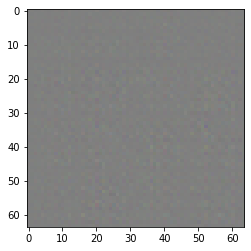

In [71]:
plt.imshow(rec_sample.reshape(64,64,3))

## 3-1. Plot VAE reconstruct Images

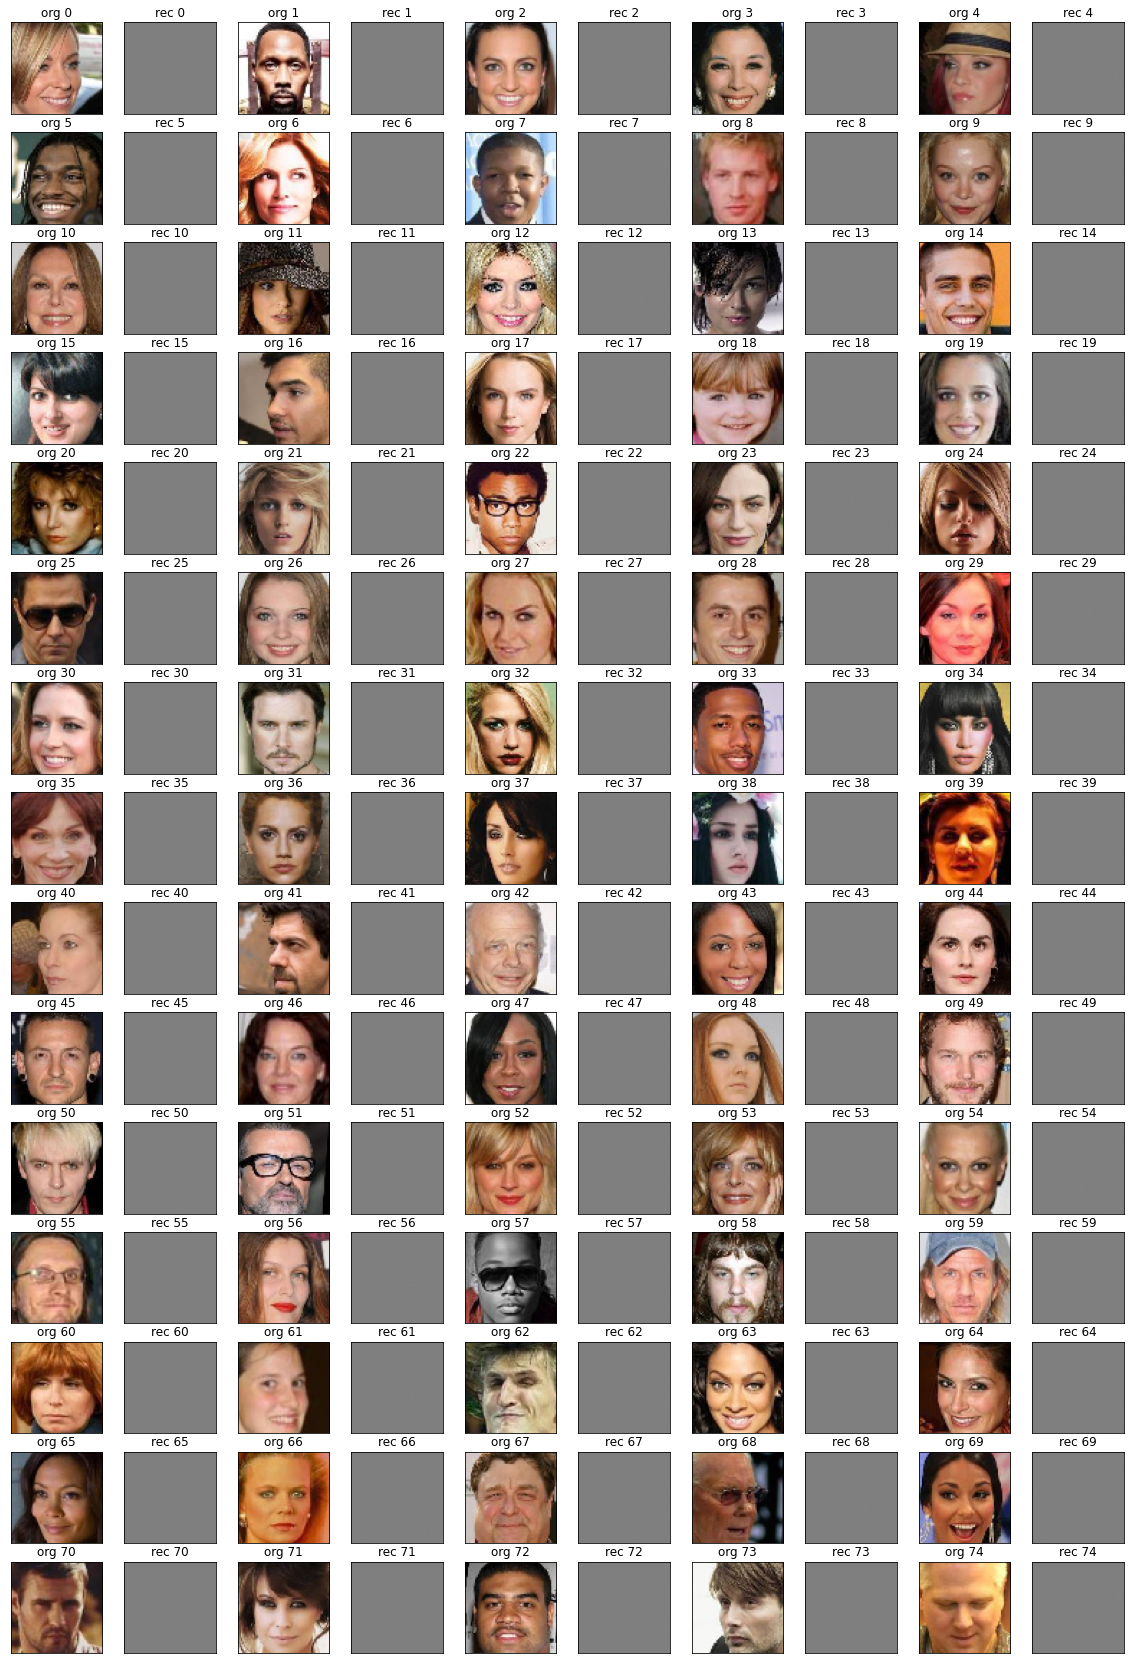

In [17]:
plot_recimg(vae, x_data, 15)

* original z space:  -10.5885935


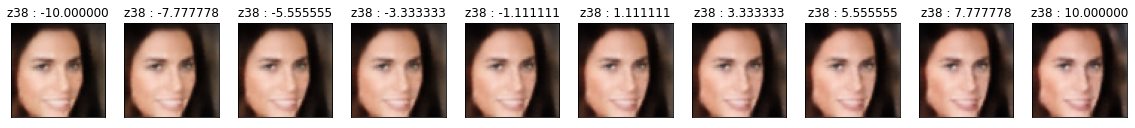

In [148]:
plot_gridimg(encoder, decoder, x_data, 26, 38, -10, 10)

In [104]:
z_pred = encoder.predict(x_data)[2]
y_pred = vae.predict(x_data)
z_pred.shape, y_pred.shape

((30000, 100), (30000, 64, 64, 3))

In [28]:
fId = sorted(np.load('./data/fmri_img/fId.npy'))
mId = sorted(np.load('./data/fmri_img/mId.npy'))

In [101]:
len(fId), len(mId)

(769, 707)

In [109]:
f_latent, m_latent=[],[]
for Id in fId[1:]:
    #fig=plt.figure()
    orgImg=x_data[y_data==Id]
    recImg=y_pred[y_data==Id]
    latent=z_pred[y_data==Id]
    print(Id, latent.shape)
    
    f_latent.append([Id, latent])
    
    #orgImg.reshape(orgImg.shape[1:])
    #recImg.reshape(recImg.shape[1:])
    #plt.subplot(1,2,1)
    #plt.title(Id)
    #plt.imshow(orgImg.reshape(orgImg.shape[1:]))
    #plt.subplot(1,2,2)
    #plt.imshow(recImg.reshape(recImg.shape[1:]))
    #plt.title(latant.shape)
print('M----')
for Id in mId[1:]:
    #fig=plt.figure()
    orgImg=x_data[y_data==Id]
    recImg=y_pred[y_data==Id]
    latent=z_pred[y_data==Id]
    print(Id, latent.shape)
    
    m_latent.append([Id, latent])


000006.jpg (1, 100)
000009.jpg (1, 100)
000010.jpg (1, 100)
000011.jpg (1, 100)
000019.jpg (1, 100)
000024.jpg (1, 100)
000026.jpg (1, 100)
000028.jpg (1, 100)
000029.jpg (1, 100)
000034.jpg (1, 100)
000035.jpg (1, 100)
000042.jpg (1, 100)
000043.jpg (1, 100)
000062.jpg (1, 100)
000066.jpg (1, 100)
000071.jpg (1, 100)
000085.jpg (1, 100)
000087.jpg (1, 100)
000099.jpg (1, 100)
000101.jpg (1, 100)
000106.jpg (1, 100)
000108.jpg (1, 100)
000111.jpg (1, 100)
000112.jpg (1, 100)
000132.jpg (1, 100)
000141.jpg (1, 100)
000151.jpg (1, 100)
000155.jpg (1, 100)
000157.jpg (1, 100)
000161.jpg (1, 100)
000176.jpg (1, 100)
000179.jpg (1, 100)
000180.jpg (1, 100)
000198.jpg (1, 100)
000204.jpg (1, 100)
000211.jpg (1, 100)
000217.jpg (1, 100)
000239.jpg (1, 100)
000249.jpg (1, 100)
000254.jpg (1, 100)
000258.jpg (1, 100)
000262.jpg (1, 100)
000263.jpg (1, 100)
000269.jpg (1, 100)
000280.jpg (1, 100)
000285.jpg (1, 100)
000287.jpg (1, 100)
000289.jpg (1, 100)
000296.jpg (1, 100)
000301.jpg (1, 100)


003201.jpg (1, 100)
003218.jpg (1, 100)
003222.jpg (1, 100)
003223.jpg (1, 100)
003224.jpg (1, 100)
003240.jpg (1, 100)
003263.jpg (1, 100)
003273.jpg (1, 100)
003275.jpg (1, 100)
003298.jpg (1, 100)
003336.jpg (1, 100)
003343.jpg (1, 100)
003344.jpg (1, 100)
003362.jpg (1, 100)
003397.jpg (1, 100)
003405.jpg (1, 100)
003409.jpg (1, 100)
003415.jpg (1, 100)
003421.jpg (1, 100)
003445.jpg (1, 100)
003453.jpg (1, 100)
003469.jpg (1, 100)
003473.jpg (1, 100)
003474.jpg (1, 100)
003537.jpg (1, 100)
003553.jpg (1, 100)
003561.jpg (1, 100)
003589.jpg (1, 100)
003590.jpg (1, 100)
003591.jpg (1, 100)
003596.jpg (1, 100)
003610.jpg (1, 100)
003637.jpg (1, 100)
003653.jpg (1, 100)
003674.jpg (1, 100)
003681.jpg (1, 100)
003759.jpg (1, 100)
003855.jpg (1, 100)
003882.jpg (1, 100)
003888.jpg (1, 100)
003910.jpg (1, 100)
003918.jpg (1, 100)
003950.jpg (1, 100)
003960.jpg (1, 100)
003962.jpg (1, 100)
003963.jpg (1, 100)
003964.jpg (1, 100)
003984.jpg (1, 100)
003989.jpg (1, 100)
004012.jpg (1, 100)


004614.jpg (1, 100)
004642.jpg (1, 100)
004656.jpg (1, 100)
004676.jpg (1, 100)
004677.jpg (1, 100)
004679.jpg (1, 100)
004711.jpg (1, 100)
004729.jpg (1, 100)
004750.jpg (1, 100)
004753.jpg (1, 100)
004760.jpg (1, 100)
004842.jpg (1, 100)
004941.jpg (1, 100)
004994.jpg (1, 100)
005006.jpg (1, 100)
005017.jpg (1, 100)
005039.jpg (1, 100)
005074.jpg (1, 100)
005118.jpg (1, 100)
005136.jpg (1, 100)
005141.jpg (1, 100)
005152.jpg (1, 100)
005208.jpg (1, 100)
005243.jpg (1, 100)
005252.jpg (1, 100)
005286.jpg (1, 100)
005328.jpg (1, 100)
005354.jpg (1, 100)
005403.jpg (1, 100)
005408.jpg (1, 100)
005472.jpg (1, 100)
005511.jpg (1, 100)
005515.jpg (1, 100)
005546.jpg (1, 100)
005584.jpg (1, 100)
005587.jpg (1, 100)
005593.jpg (1, 100)
005600.jpg (1, 100)
005601.jpg (1, 100)
005674.jpg (1, 100)
005677.jpg (1, 100)
005699.jpg (1, 100)
005732.jpg (1, 100)
005735.jpg (1, 100)
005828.jpg (1, 100)
005829.jpg (1, 100)
005849.jpg (1, 100)
005897.jpg (1, 100)
005926.jpg (1, 100)
005946.jpg (1, 100)


In [113]:
f_latent=np.array(f_latent)
m_latent=np.array(m_latent)
print(f_latent.shape, m_latent.shape)
np.save('f_latent',f_latent)
np.save('m_latent',m_latent)

(768, 2) (706, 2)


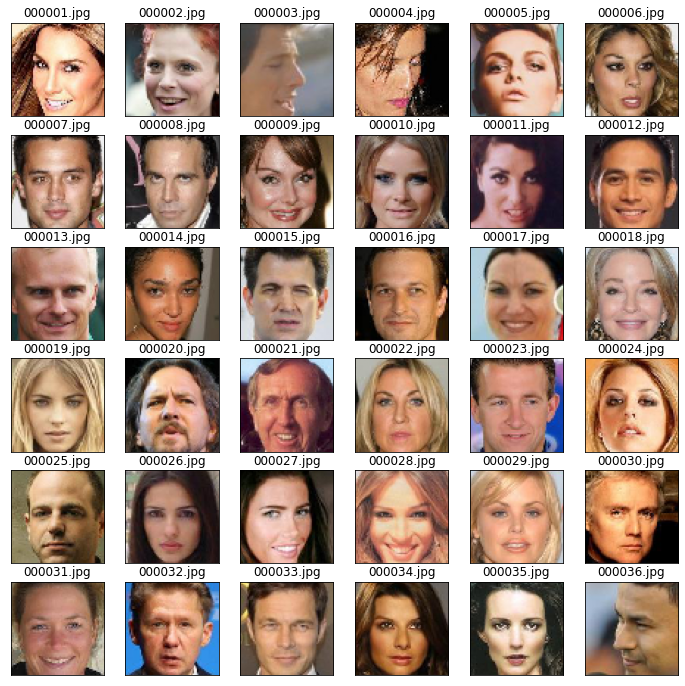

In [16]:
size = 6
fig = plt.figure(figsize=(size*2,size*2))
for i in range(size*size):
    plt.subplot(size,size,i+1)
    plt.imshow(x_data[i].reshape(x_data.shape[1:]))
    plt.xticks([])
    plt.yticks([])
    plt.title(y_data[i][0])
    #plt.subplot(size,size,i+1)
    #plt.imshow(x_data[i].reshape(x_data.shape[1:]))
plt.show()
plt.close('all')

In [ ]:
=